In [3]:
df1 = pd.read_csv("part-00000-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv")
df2 = pd.read_csv("part-00001-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv")
df3 = pd.read_csv("part-00002-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv")
df4 = pd.read_csv("part-00003-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv")
df5 = pd.read_csv("part-00004-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv")
df6 = pd.read_csv("part-00005-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv")
df7 = pd.read_csv("part-00006-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv")
df8 = pd.read_csv("part-00007-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv")
df9 = pd.read_csv("part-00008-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv")
df10 = pd.read_csv("part-00009-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv")
df11 = pd.read_csv("part-00010-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv")
df12 = pd.read_csv("part-00011-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv")
df13 = pd.read_csv("part-00012-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv")

In [1]:
import platform
import psutil
import GPUtil
import os
import subprocess
import sys

print("Restarting kernel...")
python = sys.executable
os.execl(python, python, *sys.argv)


def get_cpu_info():
    """Fetch CPU details without using 'cpuinfo'."""
    try:
        if platform.system() == "Linux":
            with open("/proc/cpuinfo", "r") as f:
                cpu_info_lines = f.readlines()
            model_name = [line.split(":")[1].strip() for line in cpu_info_lines if "model name" in line]
            return model_name[0] if model_name else "Unknown CPU"
        elif platform.system() == "Windows":
            output = subprocess.check_output("wmic cpu get Name", shell=True).decode().strip().split("\n")
            return output[1] if len(output) > 1 else "Unknown CPU"
        elif platform.system() == "Darwin":  # macOS
            return subprocess.check_output(["sysctl", "-n", "machdep.cpu.brand_string"]).decode().strip()
        else:
            return "Unknown CPU"
    except Exception as e:
        return f"Error fetching CPU info: {e}"

def get_system_info():
    """Fetch general system information."""
    system_info = {
        "System": platform.system(),
        "Node Name": platform.node(),
        "Release": platform.release(),
        "Version": platform.version(),
        "Machine": platform.machine(),
        "Processor": platform.processor(),
        "CPU Model": get_cpu_info(),
        "Physical Cores": psutil.cpu_count(logical=False),
        "Total Cores": psutil.cpu_count(logical=True),
        "Total RAM (GB)": round(psutil.virtual_memory().total / (1024 ** 3), 2),
    }

    # Get GPU details
    gpus = GPUtil.getGPUs()
    gpu_info = []
    for gpu in gpus:
        gpu_info.append({
            "GPU Name": gpu.name,
            "Total Memory (GB)": gpu.memoryTotal,
            "Free Memory (GB)": gpu.memoryFree,
            "Used Memory (GB)": gpu.memoryUsed,
            "GPU Load (%)": gpu.load * 100
        })

    return system_info, gpu_info

if __name__ == "__main__":
    sys_info, gpu_details = get_system_info()

    print("\nSystem Information:")
    for key, value in sys_info.items():
        print(f"{key}: {value}")

    print("\nGPU Information:")
    if gpu_details:
        for i, gpu in enumerate(gpu_details):
            print(f"\nGPU {i + 1}:")
            for key, value in gpu.items():
                print(f"{key}: {value}")
    else:
        print("No GPU detected.")


: 

In [2]:
pip install --upgrade psutil GPUtil

Defaulting to user installation because normal site-packages is not writeable
  Using cached psutil-6.1.1-cp36-abi3-manylinux_2_12_x86_64.manylinux2010_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (287 kB)
  Preparing metadata (setup.py) ... done
  DEPRECATION: GPUtil is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559
  Running setup.py install for GPUtil ... done
  Attempting uninstall: psutil
    Found existing installation: psutil 6.1.0
    Uninstalling psutil-6.1.0:
      Successfully uninstalled psutil-6.1.0
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd

# List of all dataframes except df1
dfs = [df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12,df13]

# Combine all dataframes:
# - Use header=None for all dataframes except the first one
# - Use ignore_index=True to reset the index
combined_df = pd.concat(dfs, ignore_index=True)

# Get the final merged dataframe by combining df1 with the rest
df = pd.concat([df1, combined_df], ignore_index=True)

# If you want to save the combined dataframe
# final_df.to_csv("combined_output.csv", index=False)

In [ ]:
import IPython
IPython.Application.instance().kernel.do_shutdown(restart=True)

{'status': 'ok', 'restart': True}

: 

In [23]:
df.head()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,54.00,6.00,64.00,0.329807,0.329807,0.0,1.0,0.0,1.0,...,0.000000,54.00,8.334383e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-RSTFINFlood
1,0.000000,57.04,6.33,64.00,4.290556,4.290556,0.0,0.0,0.0,0.0,...,2.822973,57.04,8.292607e+07,9.5,10.464666,4.010353,160.987842,0.05,141.55,DoS-TCP_Flood
2,0.000000,0.00,1.00,64.00,33.396799,33.396799,0.0,0.0,0.0,0.0,...,0.000000,42.00,8.312799e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
3,0.328175,76175.00,17.00,64.00,4642.133010,4642.133010,0.0,0.0,0.0,0.0,...,0.000000,50.00,8.301570e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DoS-UDP_Flood
4,0.117320,101.73,6.11,65.91,6.202211,6.202211,0.0,0.0,1.0,0.0,...,23.113111,57.88,8.297300e+07,9.5,11.346876,32.716243,3016.808286,0.19,141.55,DoS-SYN_Flood


In [24]:
df.tail()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
3078747,0.0,53.46,5.95,65.91,4.758551,4.758551,0.0,1.0,0.0,1.0,...,2.193657,54.44,8.334411e+07,9.5,10.465215,3.105629,29.654016,0.17,141.55,DDoS-RSTFINFlood
3078748,0.0,54.00,6.00,64.00,0.399940,0.399940,0.0,0.0,0.0,0.0,...,0.000000,54.00,8.295575e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DoS-TCP_Flood
3078749,0.0,0.00,1.00,64.00,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,42.00,8.315070e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
3078750,0.0,54.00,6.00,64.00,41.250851,41.250851,0.0,1.0,0.0,1.0,...,0.000000,54.00,8.334812e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-RSTFINFlood
3078751,0.0,0.00,0.99,63.36,5.111400,5.111400,0.0,0.0,0.0,0.0,...,545.166093,911.94,8.325402e+07,9.5,42.340712,771.017581,312968.120671,0.95,141.55,DDoS-ICMP_Fragmentation


In [25]:
df.sample(5)

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
2580593,0.000000,54.00,6.00,64.00,6.702393,6.702393,0.0,1.0,0.0,1.0,...,0.000000,54.00,8.334846e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-RSTFINFlood
2801279,0.000000,174.56,6.11,64.00,2515.324738,2515.324738,0.0,0.0,0.0,0.0,...,3.335913,174.56,8.306405e+07,9.5,18.731451,4.721932,62.843493,0.19,141.55,DDoS-TCP_Flood
37599,0.032997,55.78,6.00,65.68,0.804161,0.804161,0.0,1.0,0.0,1.0,...,0.099399,54.04,8.334829e+07,9.5,10.394886,0.140874,0.099958,0.10,141.55,DDoS-RSTFINFlood
682935,0.000000,54.00,6.00,64.00,7.171133,7.171133,0.0,0.0,0.0,0.0,...,0.000000,54.00,8.307231e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-TCP_Flood
2658685,0.000000,0.00,1.00,64.00,128.435068,128.435068,0.0,0.0,0.0,0.0,...,0.000000,42.00,8.315001e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3078752 entries, 0 to 3078751
Data columns (total 47 columns):
 #   Column           Dtype  
---  ------           -----  
 0   flow_duration    float64
 1   Header_Length    float64
 2   Protocol Type    float64
 3   Duration         float64
 4   Rate             float64
 5   Srate            float64
 6   Drate            float64
 7   fin_flag_number  float64
 8   syn_flag_number  float64
 9   rst_flag_number  float64
 10  psh_flag_number  float64
 11  ack_flag_number  float64
 12  ece_flag_number  float64
 13  cwr_flag_number  float64
 14  ack_count        float64
 15  syn_count        float64
 16  fin_count        float64
 17  urg_count        float64
 18  rst_count        float64
 19  HTTP             float64
 20  HTTPS            float64
 21  DNS              float64
 22  Telnet           float64
 23  SMTP             float64
 24  SSH              float64
 25  IRC              float64
 26  TCP              float64
 27  UDP         

In [26]:
df.shape

(238687, 47)

In [27]:
df.columns

Index(['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate',
       'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number',
       'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
       'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count',
       'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet',
       'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC',
       'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number',
       'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight', 'label'],
      dtype='object')

In [28]:
df.describe()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight
count,3.078752e+06,3.078752e+06,3.078752e+06,3.078752e+06,3.078752e+06,3.078752e+06,3.078752e+06,3.078752e+06,3.078752e+06,3.078752e+06,...,3.078752e+06,3.078752e+06,3.078752e+06,3.078752e+06,3.078752e+06,3.078752e+06,3.078752e+06,3.078752e+06,3.078752e+06,3.078752e+06
mean,5.731447e+00,7.723244e+04,9.063378e+00,6.636097e+01,9.082626e+03,9.082626e+03,3.527668e-06,8.652597e-02,2.068955e-01,9.044087e-02,...,1.247796e+02,3.344849e+01,1.247807e+02,8.319080e+07,9.498839e+00,1.312562e+01,4.726947e+01,3.099260e+04,9.655321e-02,1.415218e+02
std,2.763899e+02,4.637879e+05,8.936909e+00,1.407471e+01,1.002964e+05,1.002964e+05,2.227235e-03,2.811392e-01,4.050800e-01,2.868124e-01,...,2.414253e+02,1.610449e+02,2.420069e+02,1.706919e+07,8.203328e-01,8.635062e+00,2.277737e+02,3.378512e+05,2.331680e-01,2.109670e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.200000e+01,0.000000e+00,4.200000e+01,0.000000e+00,1.000000e+00,9.165151e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,0.000000e+00,5.400000e+01,6.000000e+00,6.400000e+01,2.095964e+00,2.095964e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,5.000000e+01,0.000000e+00,5.000000e+01,8.307157e+07,9.500000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.415500e+02
50%,0.000000e+00,5.400000e+01,6.000000e+00,6.400000e+01,1.580846e+01,1.580846e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,5.400000e+01,0.000000e+00,5.400000e+01,8.312452e+07,9.500000e+00,1.039230e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.415500e+02
75%,1.045754e-01,2.985600e+02,1.440000e+01,6.400000e+01,1.177583e+02,1.177583e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,5.405011e+01,3.733221e-01,5.406000e+01,8.334390e+07,9.500000e+00,1.039673e+01,5.059213e-01,1.360984e+00,8.000000e-02,1.415500e+02
max,9.943576e+04,9.889368e+06,4.700000e+01,2.550000e+02,8.388608e+06,8.388608e+06,2.679210e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,8.040961e+03,1.099626e+04,1.309800e+04,1.676394e+08,1.500000e+01,1.252094e+02,1.555106e+04,1.372844e+08,1.000000e+00,2.446000e+02


In [29]:
df.isnull().sum()

flow_duration      0
Header_Length      0
Protocol Type      0
Duration           0
Rate               0
Srate              0
Drate              0
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag_number    0
ece_flag_number    0
cwr_flag_number    0
ack_count          0
syn_count          0
fin_count          0
urg_count          0
rst_count          0
HTTP               0
HTTPS              0
DNS                0
Telnet             0
SMTP               0
SSH                0
IRC                0
TCP                0
UDP                0
DHCP               0
ARP                0
ICMP               0
IPv                0
LLC                0
Tot sum            0
Min                0
Max                0
AVG                0
Std                0
Tot size           0
IAT                0
Number             0
Magnitue           0
Radius             0
Covariance         0
Variance           0
Weight             0
label              0
dtype: int64

In [42]:
df.duplicated().sum()

0

In [44]:
df_sample = df.sample(n=3000, random_state=42)

In [46]:
df_sample.shape

(3000, 47)

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

Correlation Matrix:
                 flow_duration  Header_Length  Protocol Type  Duration  \
flow_duration         1.000000       0.009258       0.003800  0.029033   
Header_Length         0.009258       1.000000       0.049436  0.314523   
Protocol Type         0.003800       0.049436       1.000000 -0.011948   
Duration              0.029033       0.314523      -0.011948  1.000000   
Rate                 -0.001574      -0.011613       0.016323 -0.009623   
Srate                -0.001574      -0.011613       0.016323 -0.009623   
Drate                -0.000052      -0.000510      -0.001046 -0.000489   
fin_flag_number      -0.005481      -0.051158      -0.105365 -0.049311   
syn_flag_number      -0.007190      -0.085220      -0.174258 -0.077542   
rst_flag_number      -0.005492      -0.052415      -0.108040 -0.038875   
psh_flag_number      -0.004820      -0.030637      -0.106728 -0.017963   
ack_flag_number       0.011897       0.181774      -0.120354  0.299757   
ece_flag_number   

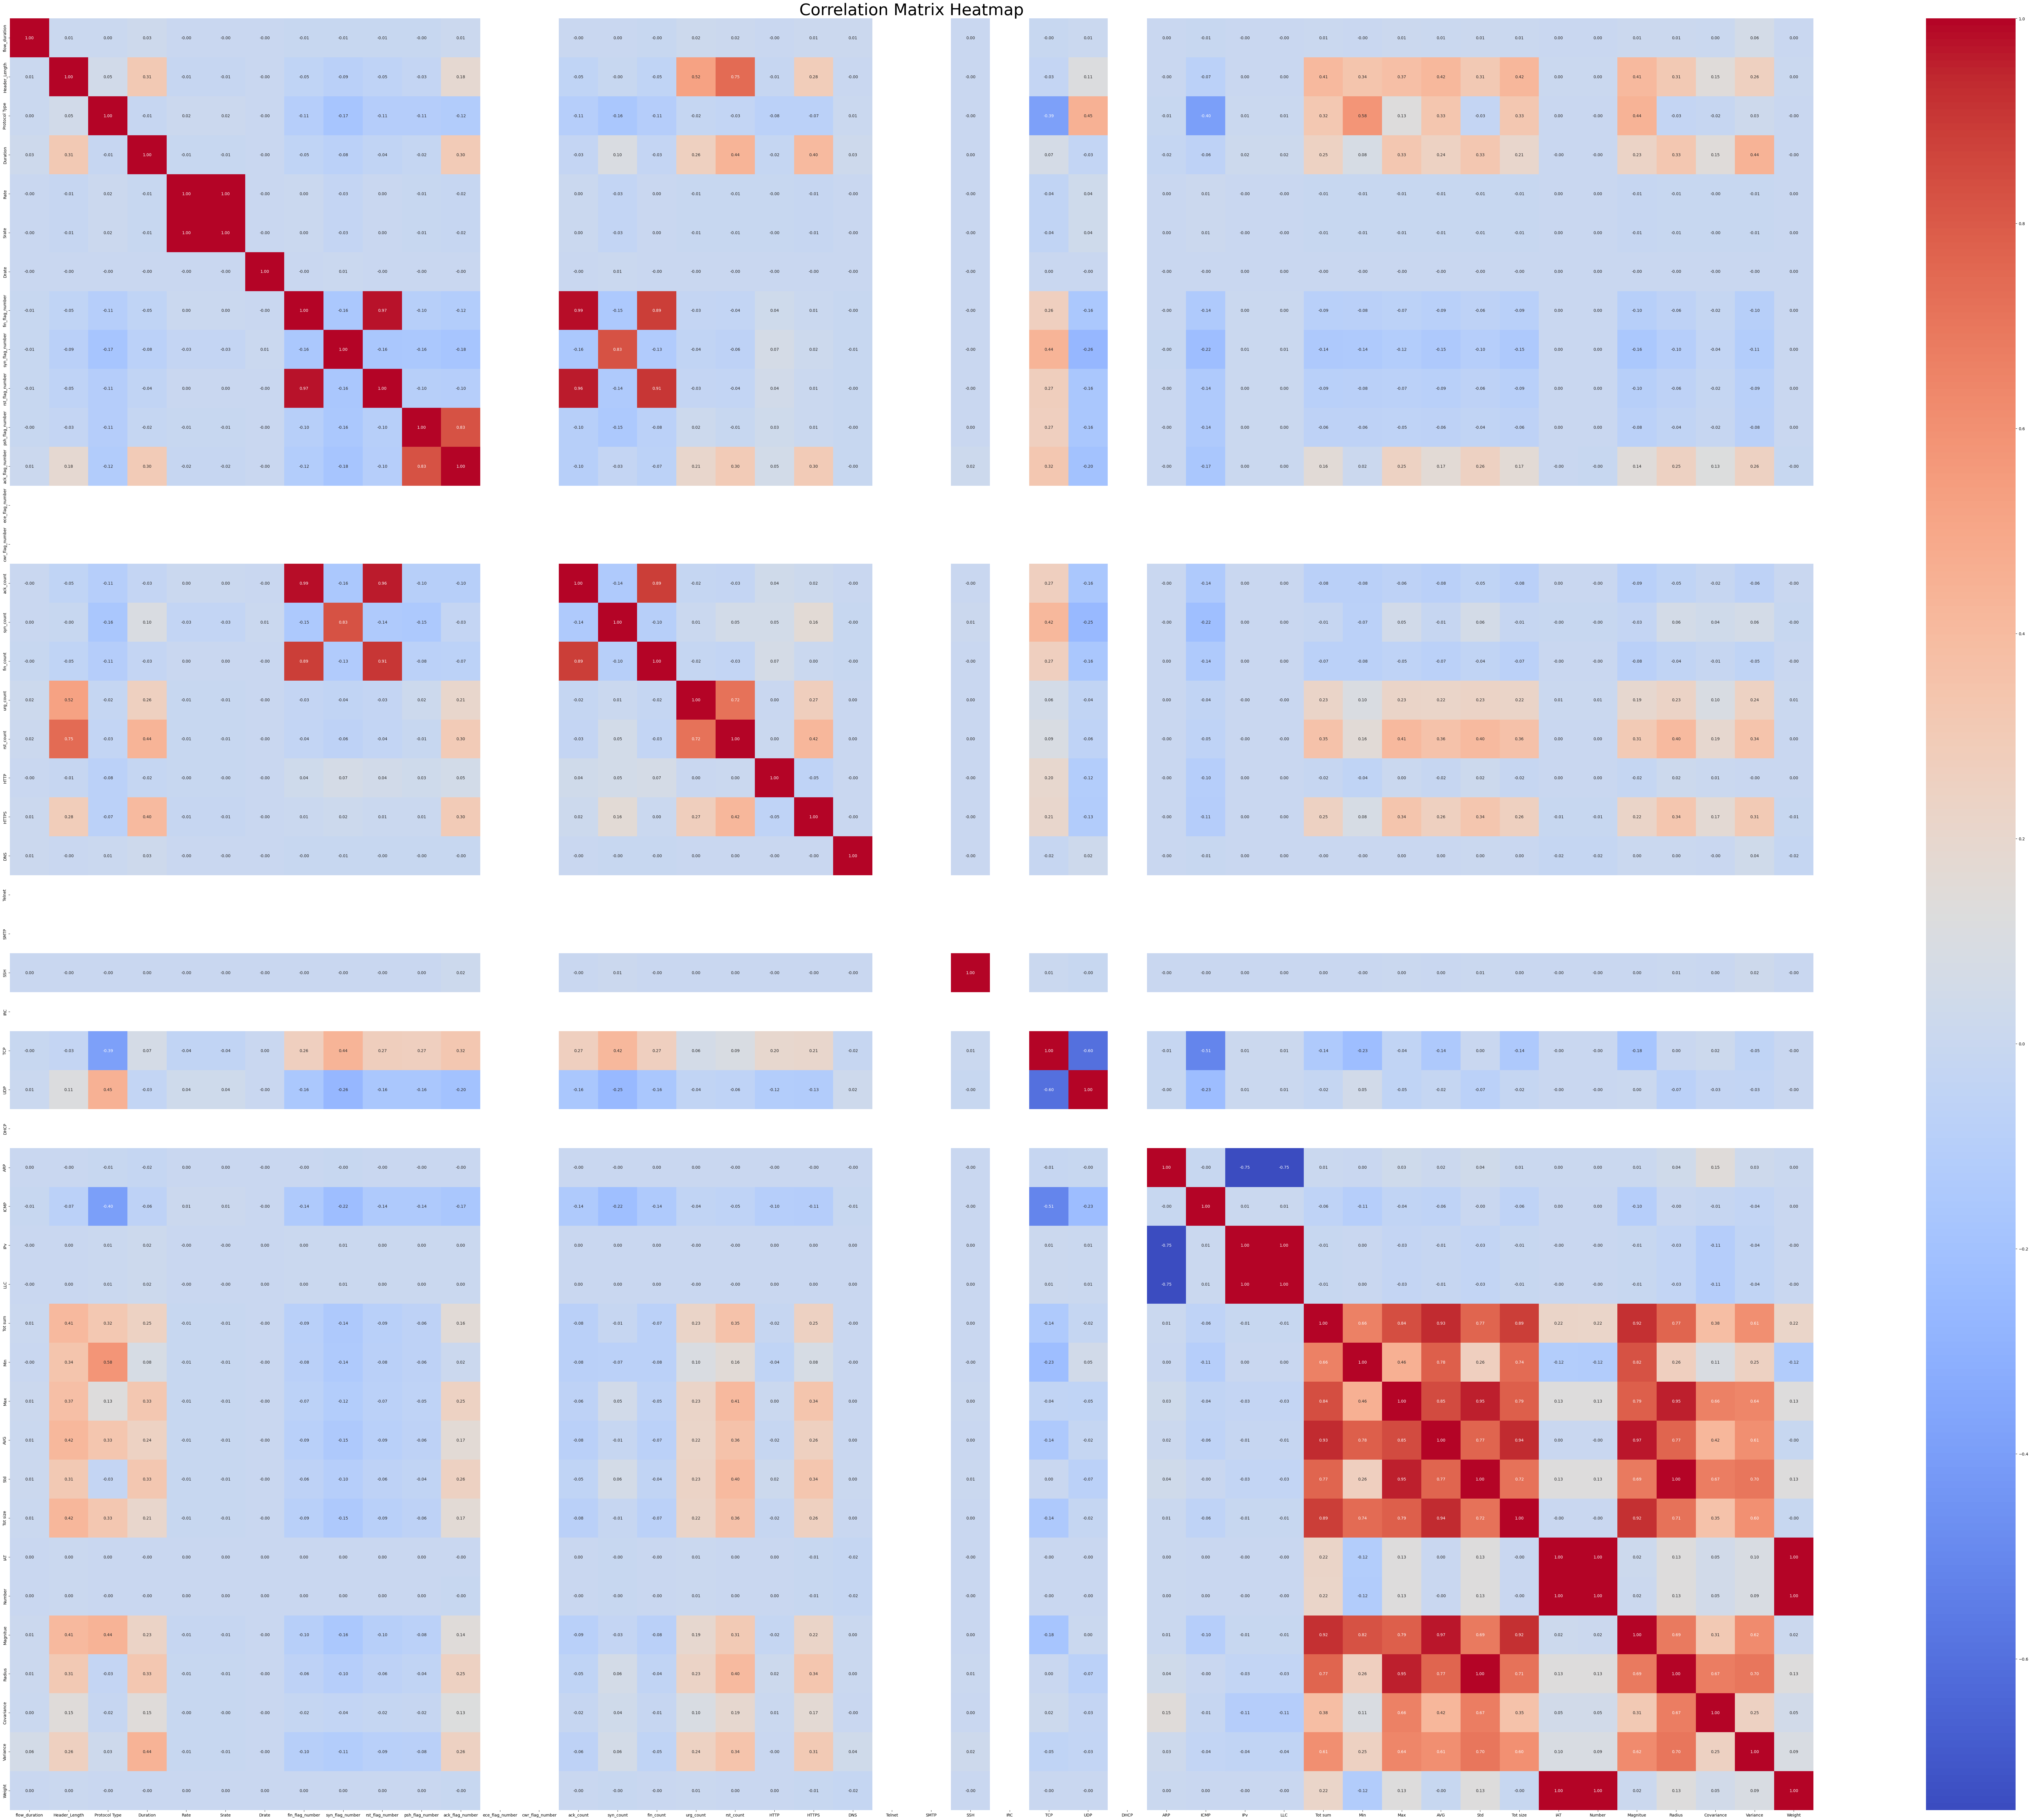

In [12]:
# Extract sample without the label column
df_sample_without_label = df.iloc[:, :-1]

# Calculate the correlation matrix for the sample without the label column
corr_mat = df_sample_without_label.corr()

# Print the correlation matrix in a readable format
print("Correlation Matrix:")
print(corr_mat)

# Save the correlation matrix to a CSV file
corr_mat.to_csv('correlation_matrix.csv', index=True)

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(100, 80))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap', fontsize=40)
plt.show()

In [ ]:
df

# Corrected list of selected features
selected_features = [
    'flow_duration', 'Header_Length', 'Protocol Type', 'Duration',
    'Rate', 'Drate', 'syn_flag_number', 'ack_flag_number',
    'TCP', 'UDP', 'ICMP', 'HTTP', 'HTTPS', 'DNS', 'IAT',
    'Magnitue', 'Weight', 'IPv', 'label'
]

# Keeping only the selected features from the dataset
df_selected = df[selected_features]


In [4]:
df['label'].unique().tolist()

['DDoS-RSTFINFlood',
 'DoS-TCP_Flood',
 'DDoS-ICMP_Flood',
 'DoS-UDP_Flood',
 'DoS-SYN_Flood',
 'Mirai-greeth_flood',
 'DDoS-SynonymousIP_Flood',
 'Mirai-udpplain',
 'DDoS-SYN_Flood',
 'DDoS-PSHACK_Flood',
 'DDoS-TCP_Flood',
 'DDoS-UDP_Flood',
 'BenignTraffic',
 'MITM-ArpSpoofing',
 'DDoS-ACK_Fragmentation',
 'Mirai-greip_flood',
 'DoS-HTTP_Flood',
 'DDoS-ICMP_Fragmentation',
 'Recon-PortScan',
 'DNS_Spoofing',
 'DDoS-UDP_Fragmentation',
 'Recon-OSScan',
 'XSS',
 'DDoS-HTTP_Flood',
 'Recon-HostDiscovery',
 'CommandInjection',
 'VulnerabilityScan',
 'DDoS-SlowLoris',
 'Backdoor_Malware',
 'BrowserHijacking',
 'DictionaryBruteForce',
 'SqlInjection',
 'Recon-PingSweep',
 'Uploading_Attack']

In [31]:
label_counts = df_selected['label'].value_counts()
label_counts

DDoS-ICMP_Flood            474569
DDoS-UDP_Flood             356981
DDoS-TCP_Flood             297160
DDoS-PSHACK_Flood          270686
DDoS-SYN_Flood             267968
DDoS-RSTFINFlood           266601
DDoS-SynonymousIP_Flood    236759
DoS-UDP_Flood              219286
DoS-TCP_Flood              176009
DoS-SYN_Flood              132636
BenignTraffic               72542
Mirai-greeth_flood          64993
Mirai-udpplain              58771
Mirai-greip_flood           49556
DDoS-ICMP_Fragmentation     29853
MITM-ArpSpoofing            20393
DDoS-UDP_Fragmentation      19089
DDoS-ACK_Fragmentation      18878
DNS_Spoofing                11900
Recon-HostDiscovery          8803
Recon-OSScan                 6613
Recon-PortScan               5405
DoS-HTTP_Flood               4804
VulnerabilityScan            2452
DDoS-HTTP_Flood              1899
DDoS-SlowLoris               1558
DictionaryBruteForce          843
BrowserHijacking              375
SqlInjection                  351
CommandInjecti

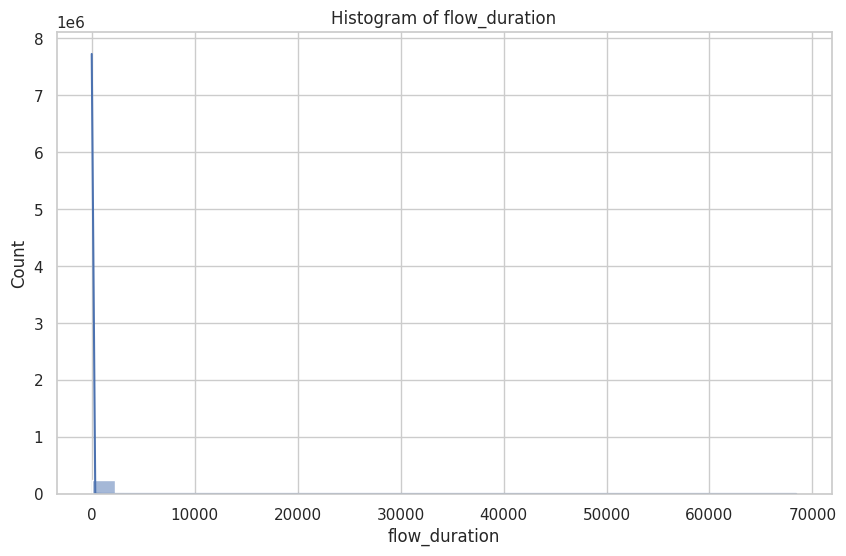

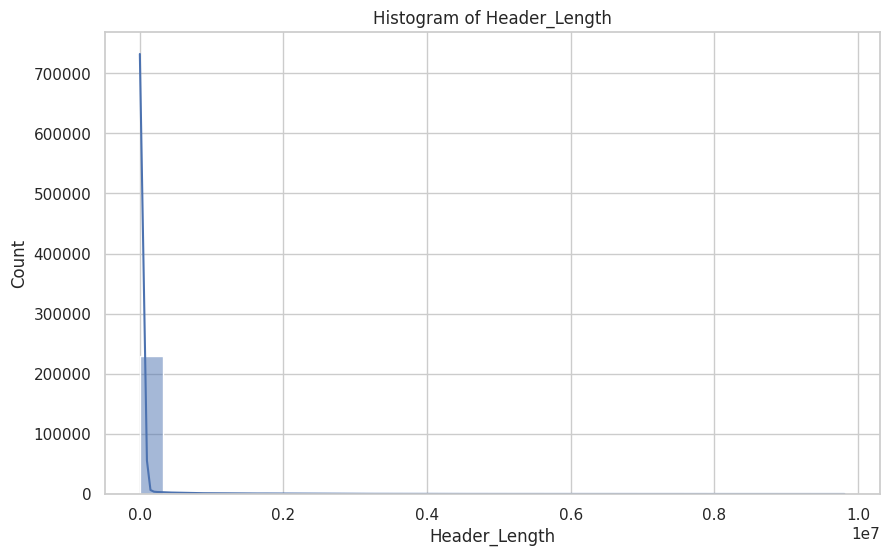

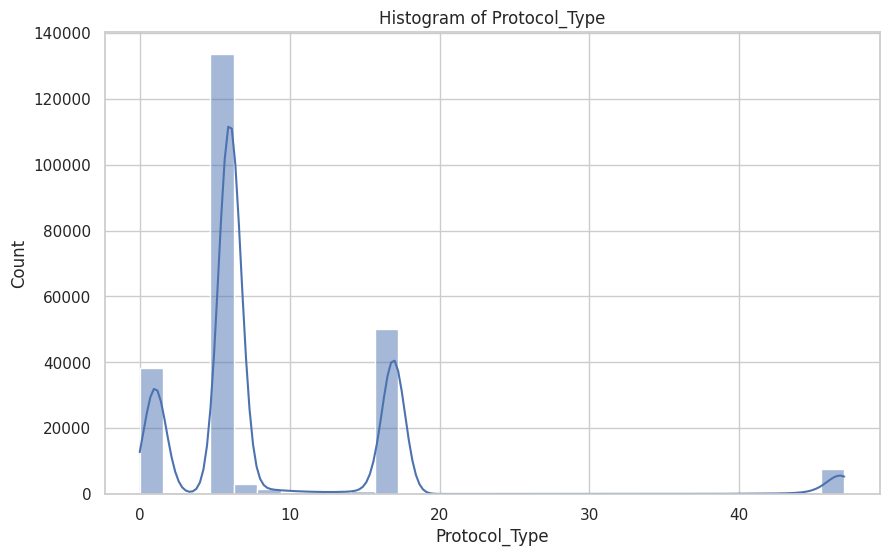

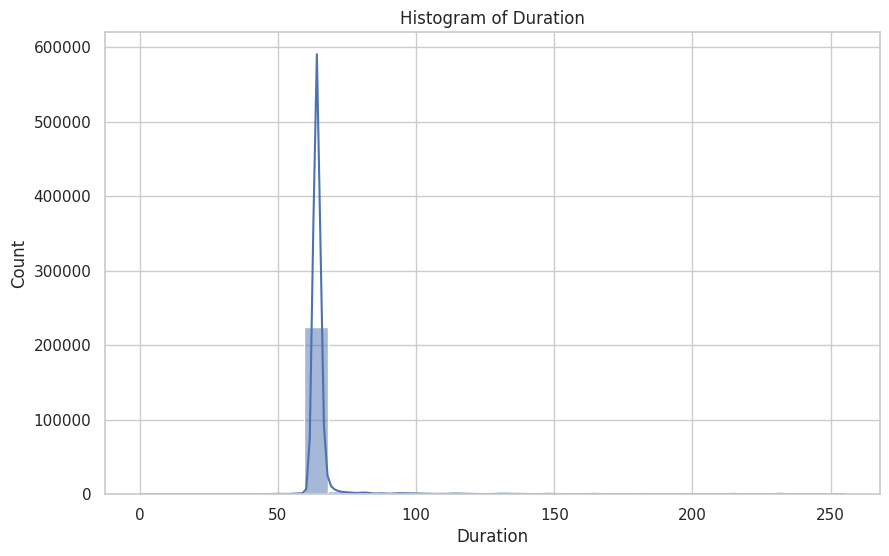

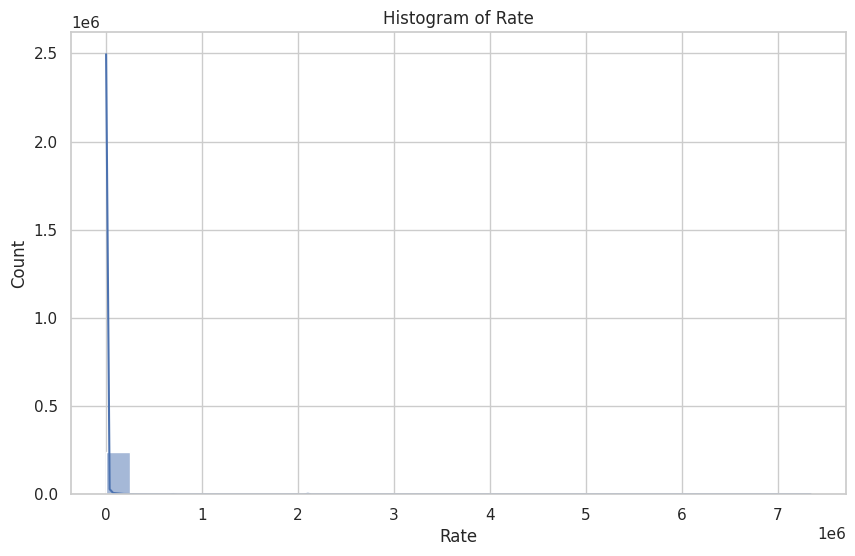

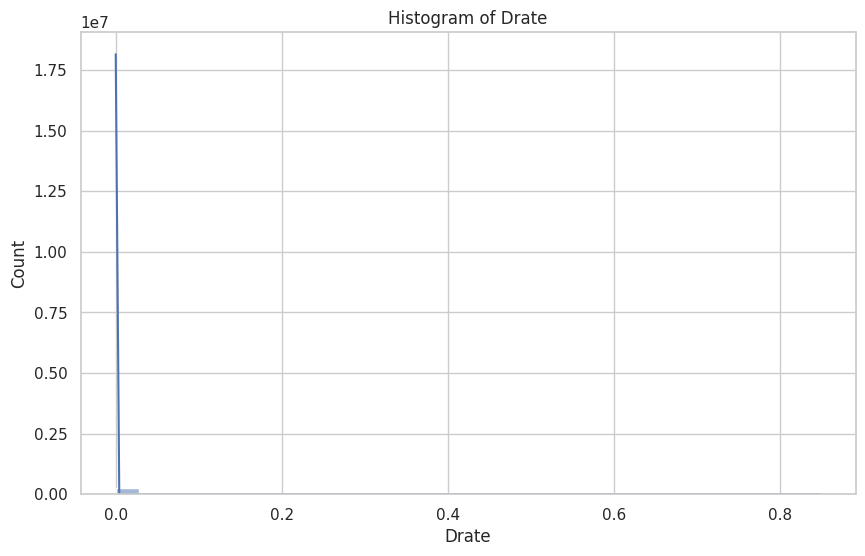

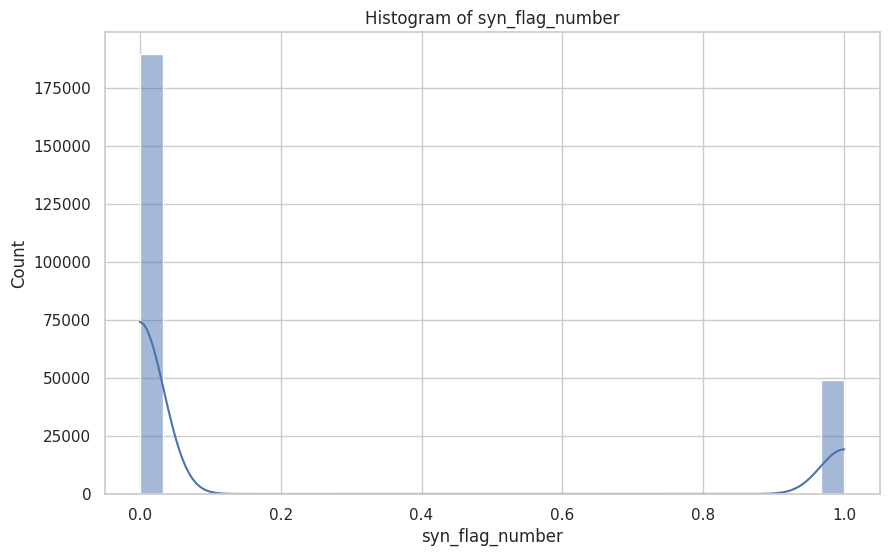

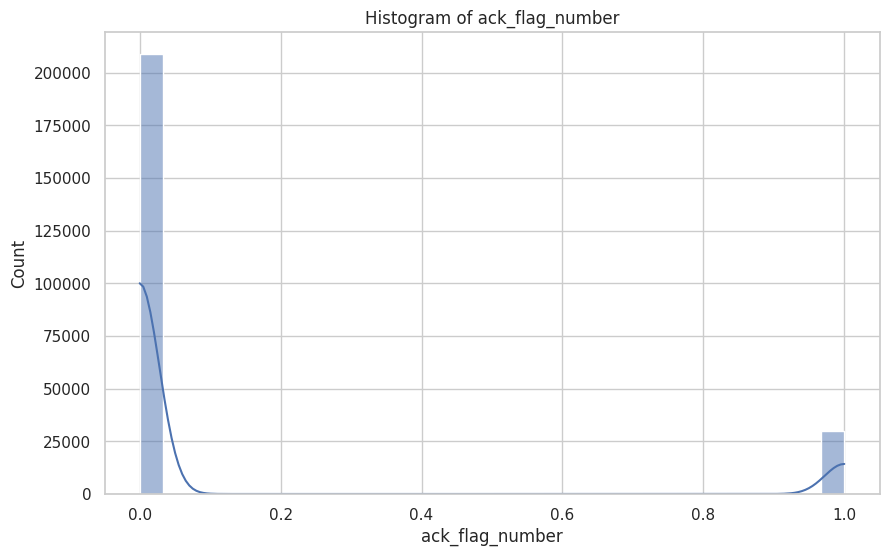

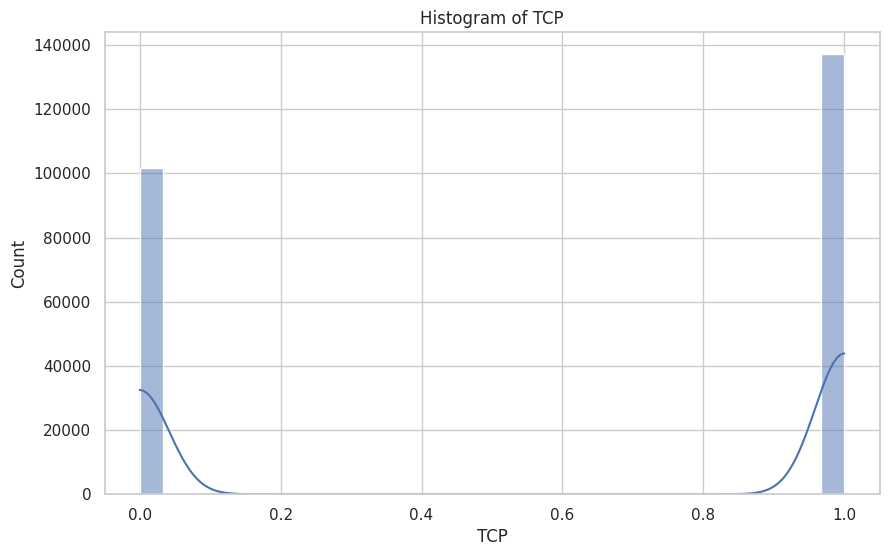

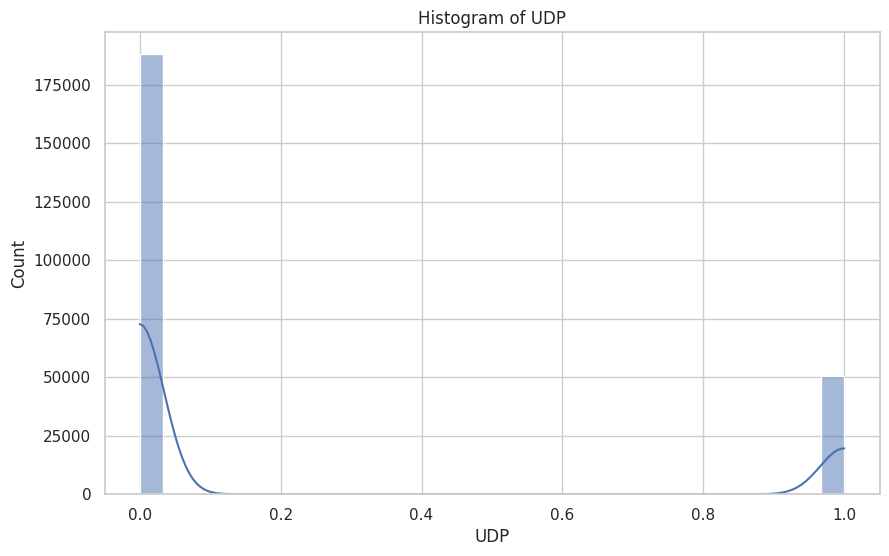

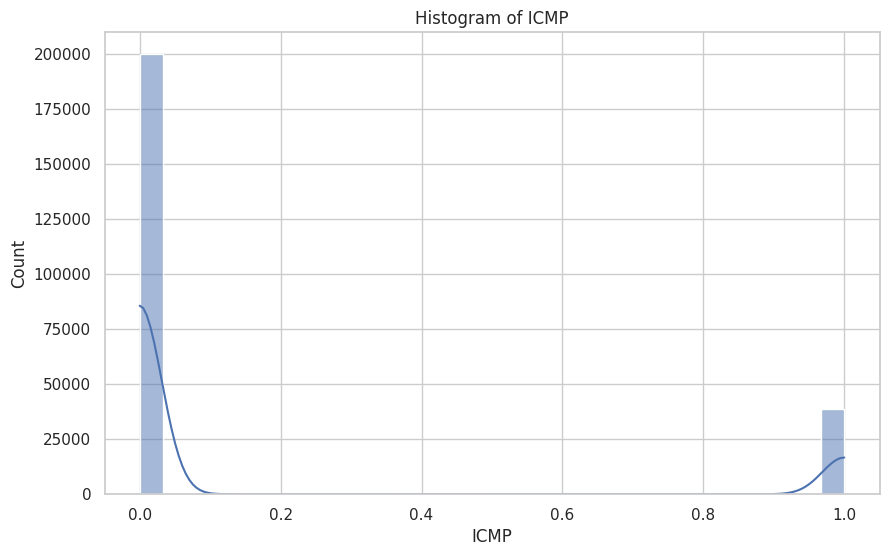

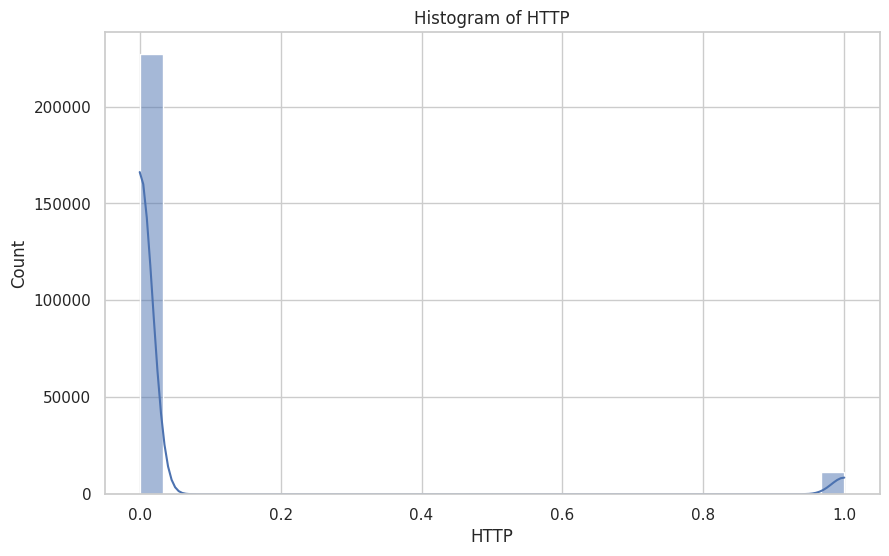

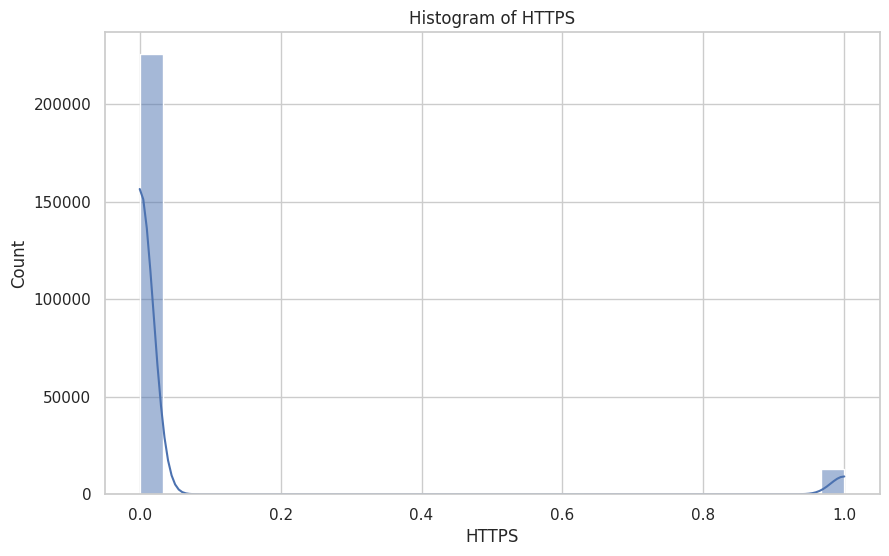

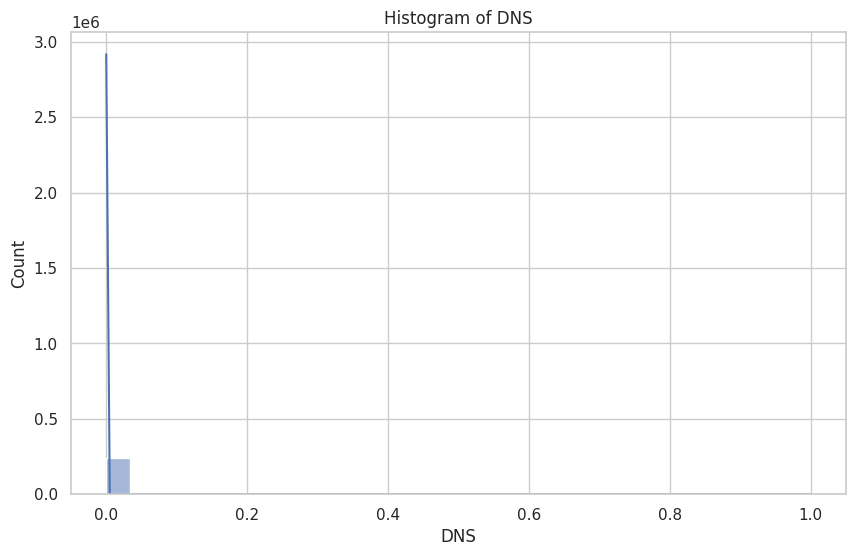

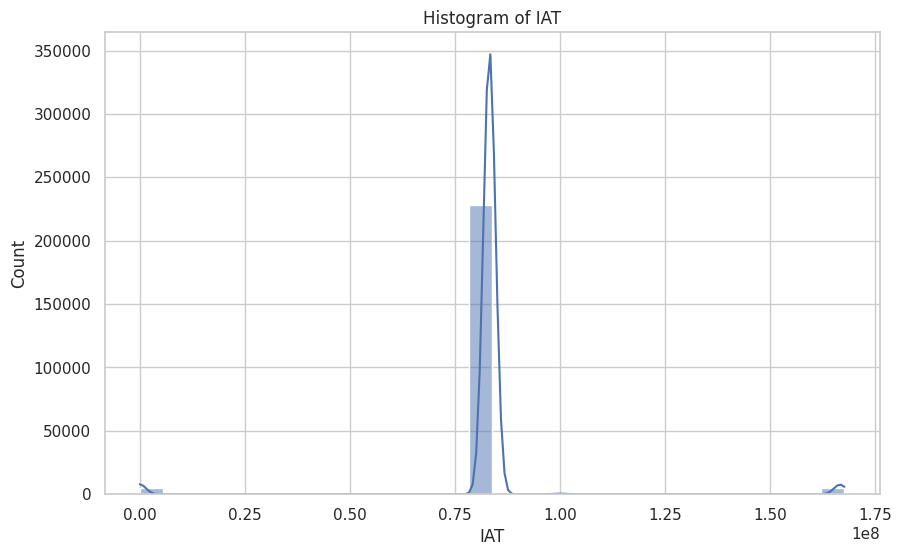

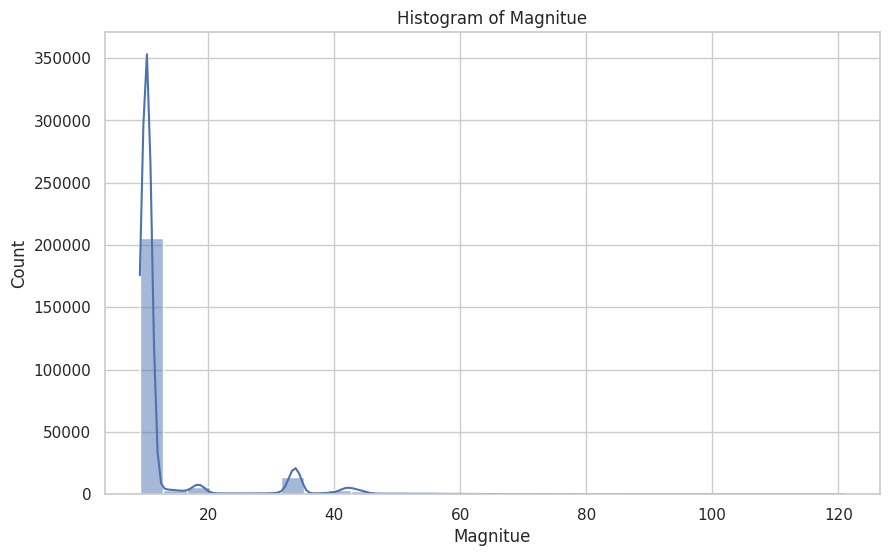

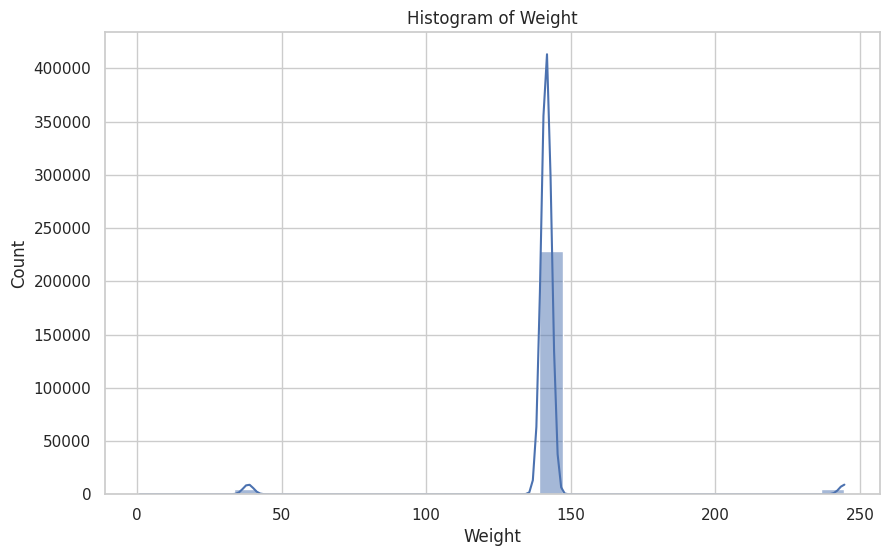

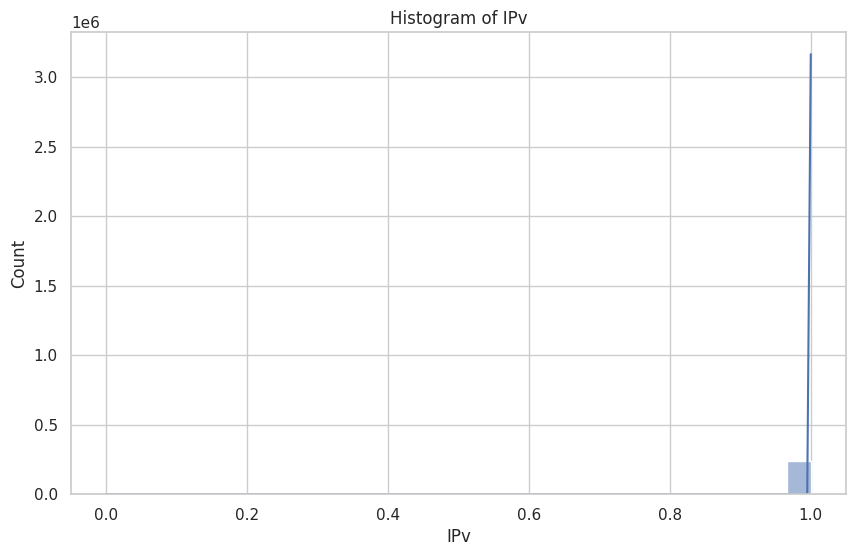

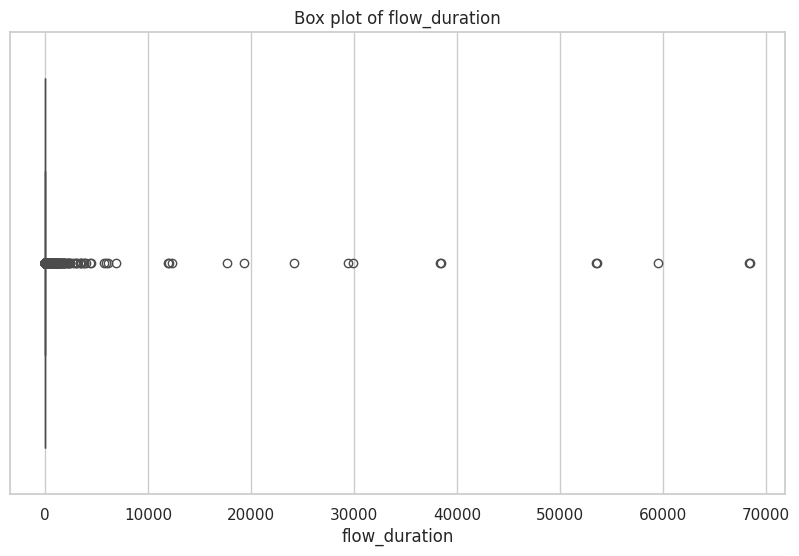

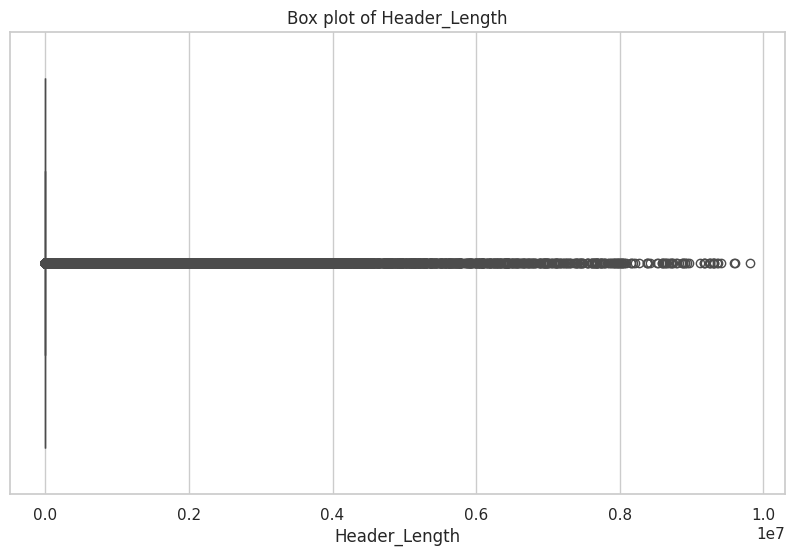

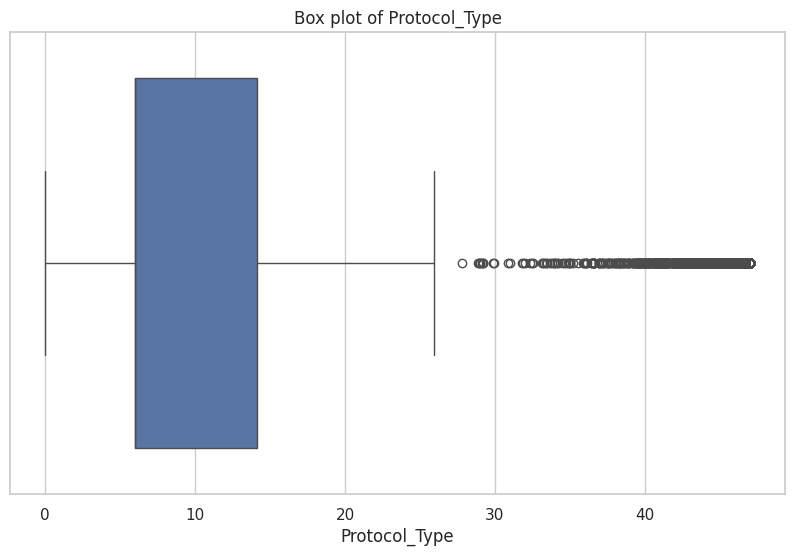

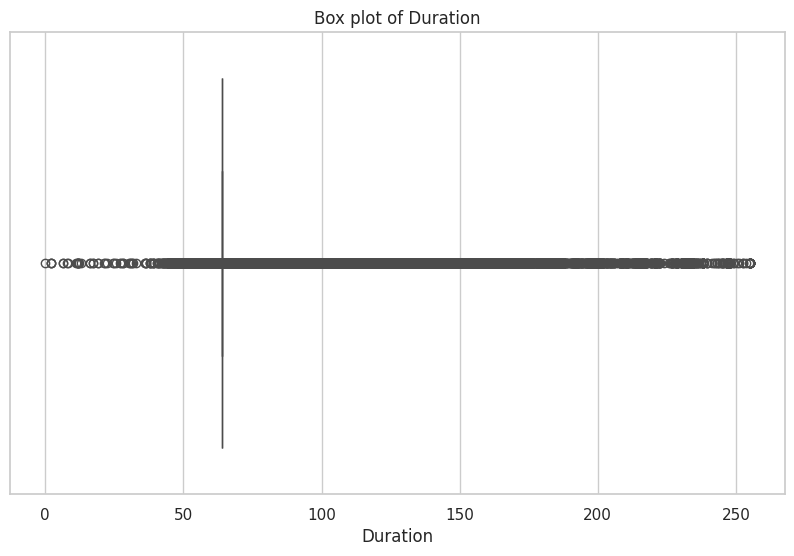

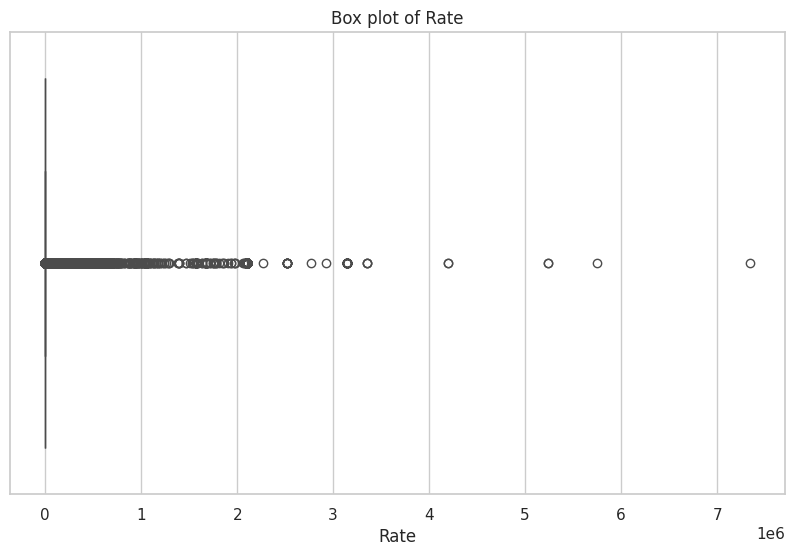

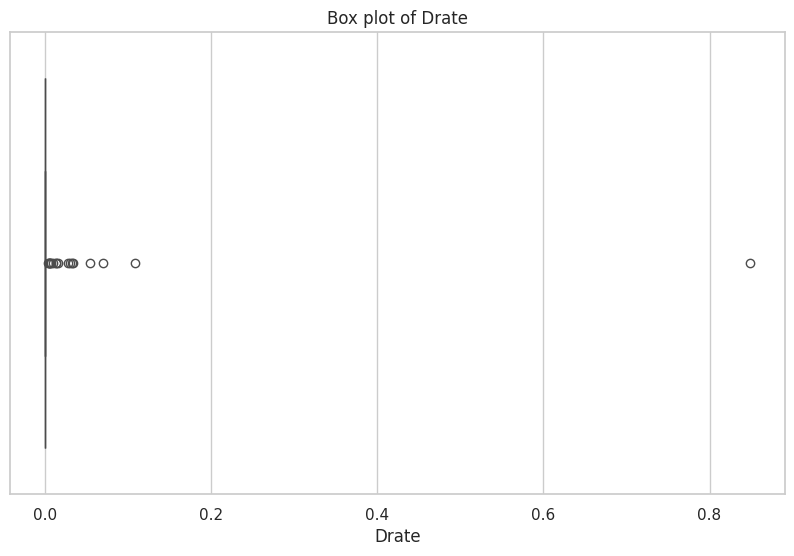

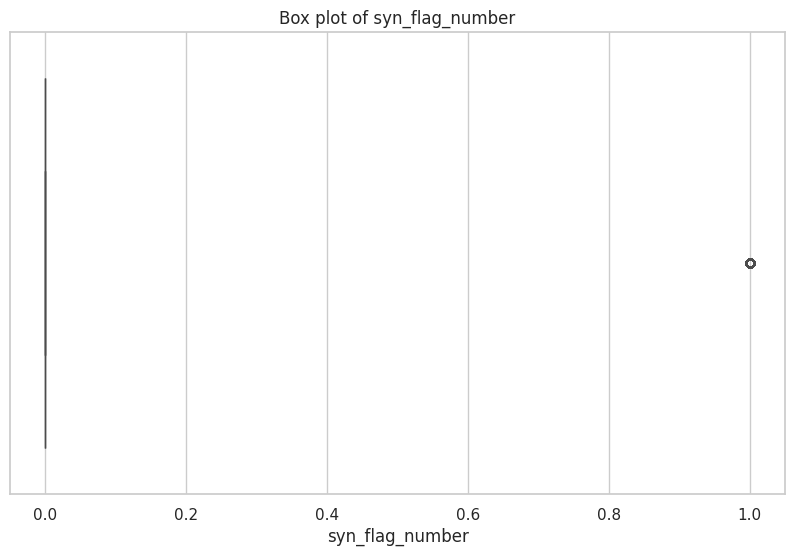

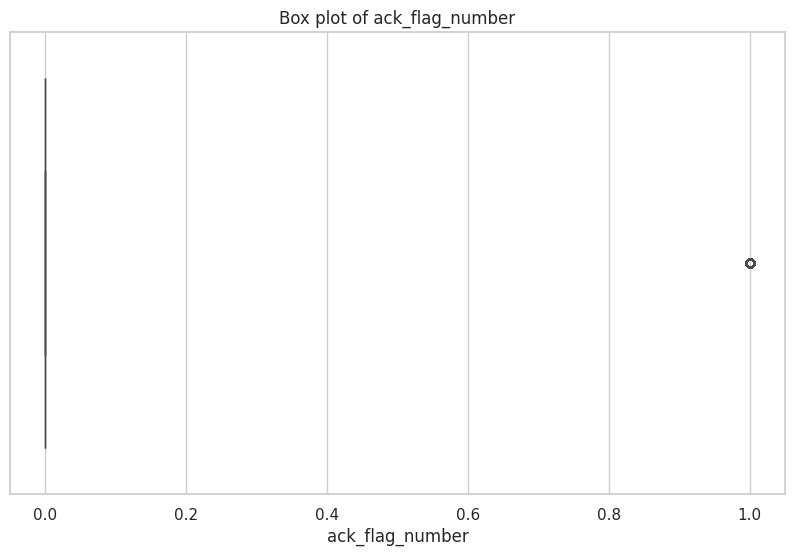

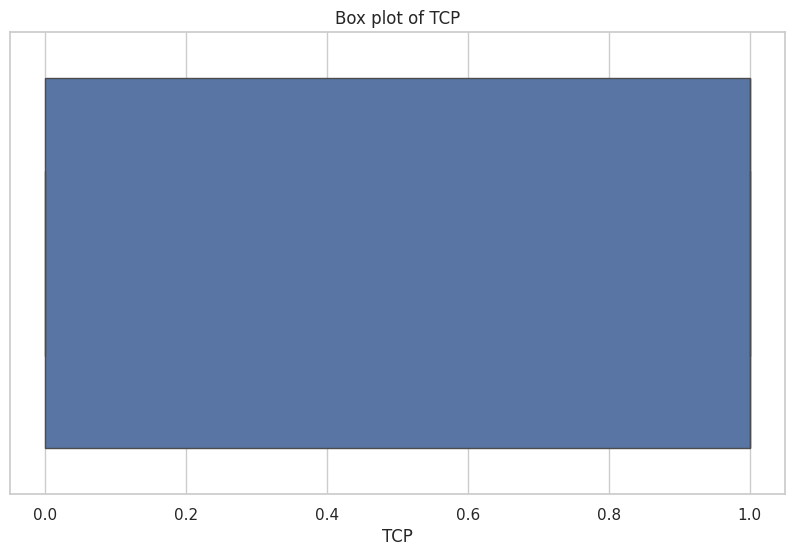

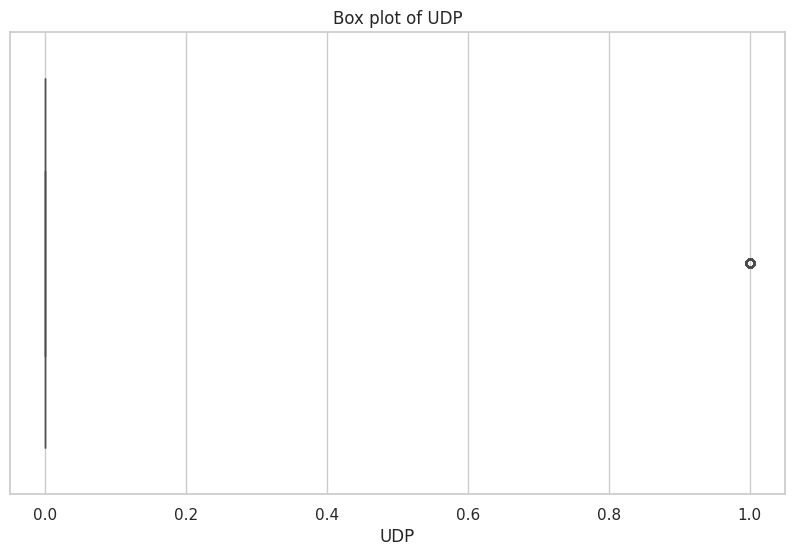

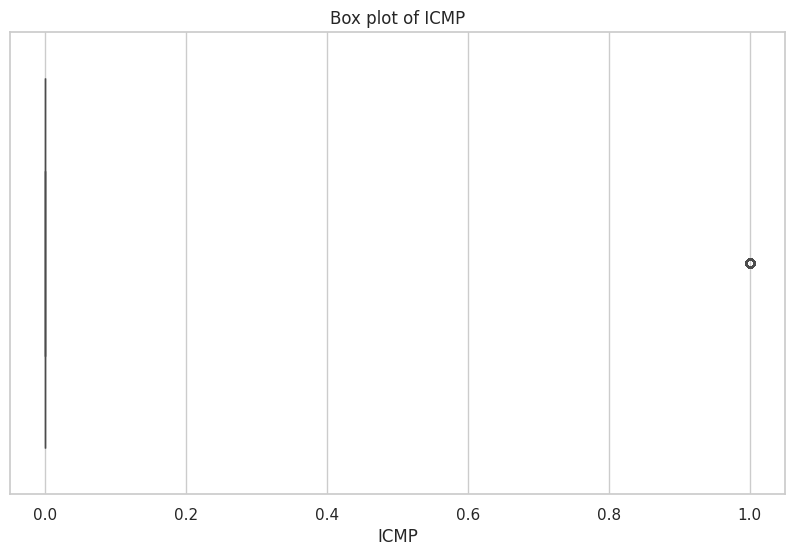

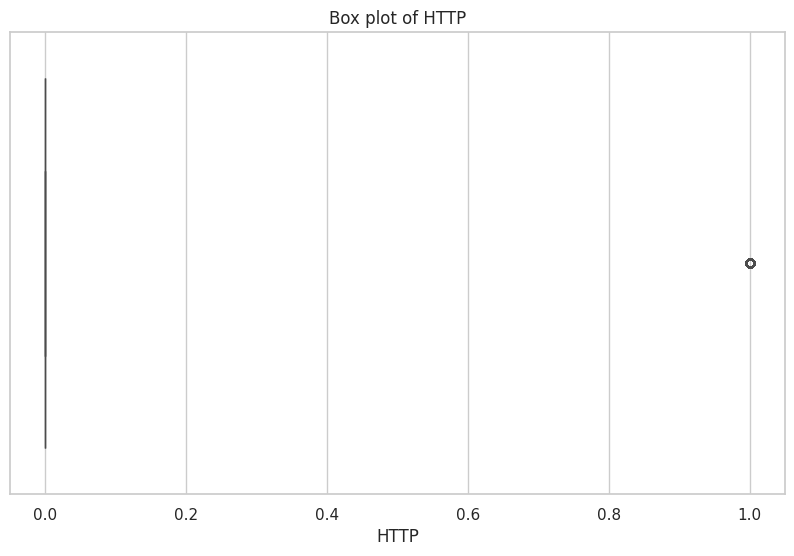

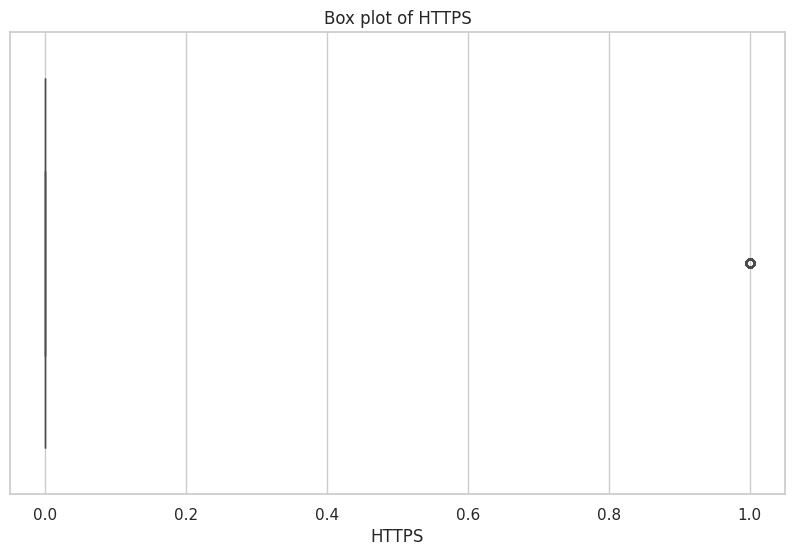

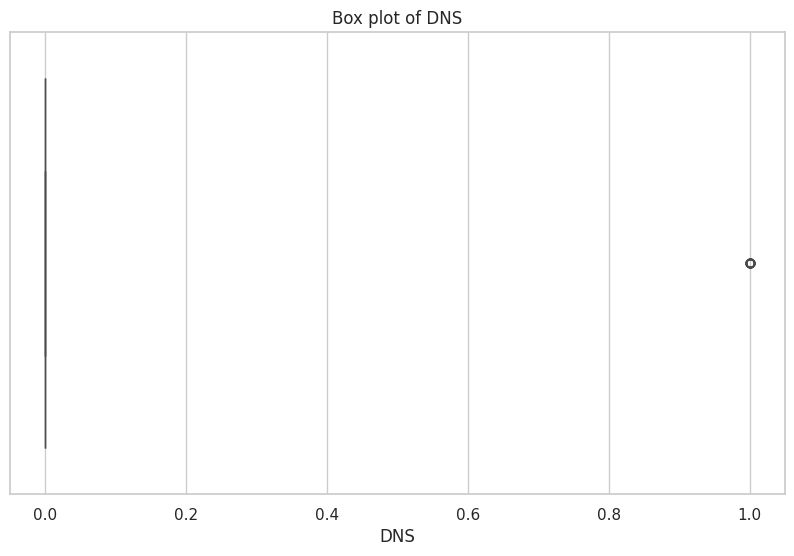

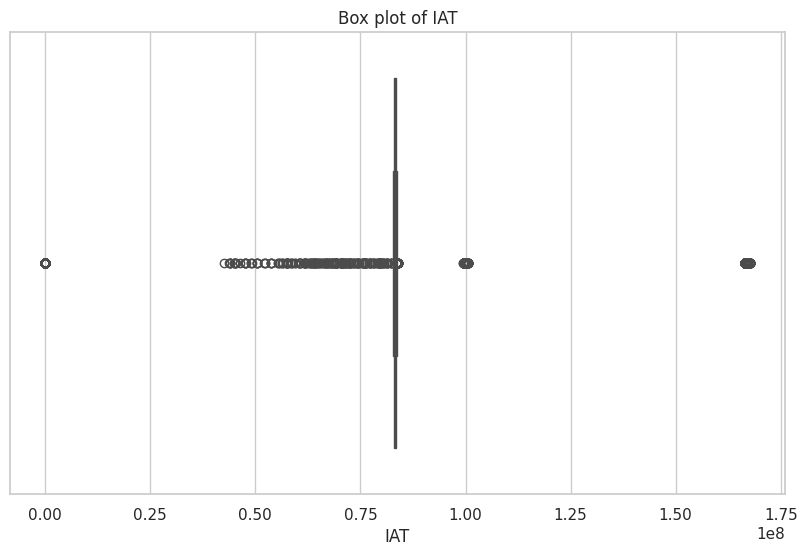

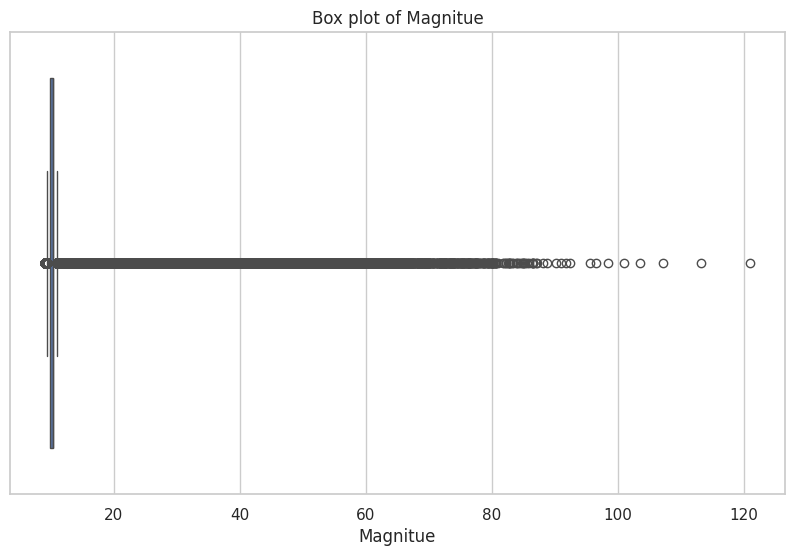

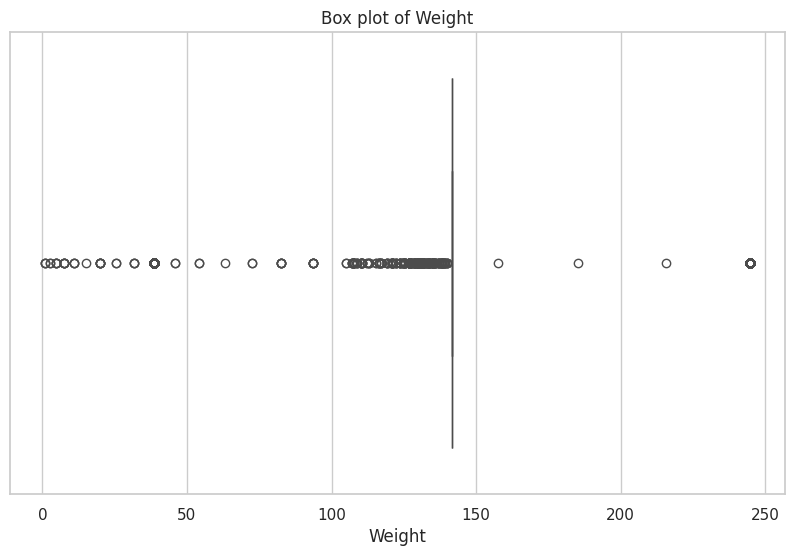

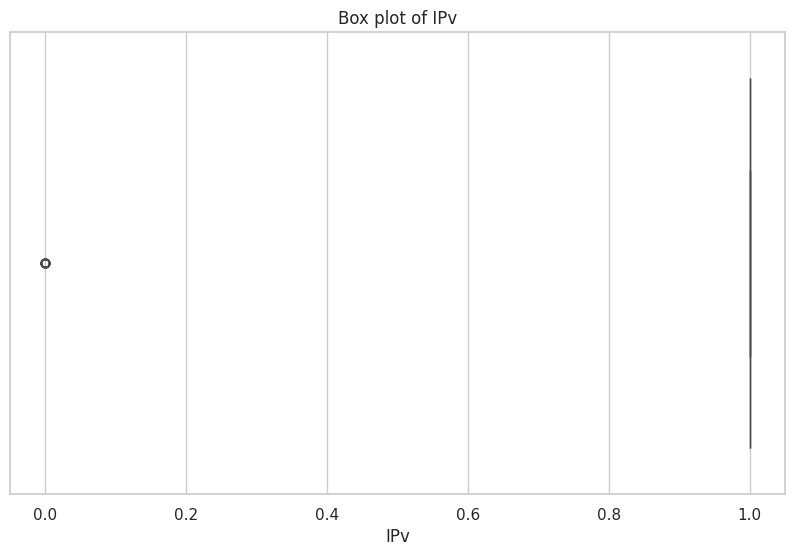

       flow_duration  Header_Length  Protocol_Type       Duration  \
count  238687.000000   2.386870e+05  238687.000000  238687.000000   
mean        5.907665   7.700997e+04       9.052570      66.345189   
std       327.743332   4.596463e+05       8.902223      14.025283   
min         0.000000   0.000000e+00       0.000000       0.000000   
25%         0.000000   5.400000e+01       6.000000      64.000000   
50%         0.000000   5.400000e+01       6.000000      64.000000   
75%         0.104513   3.368950e+02      14.120000      64.000000   
max     68430.712218   9.809700e+06      47.000000     255.000000   

               Rate          Drate  syn_flag_number  ack_flag_number  \
count  2.386870e+05  238687.000000    238687.000000    238687.000000   
mean   9.384479e+03       0.000005         0.206132         0.124745   
std    1.007839e+05       0.001765         0.404527         0.330430   
min    0.000000e+00       0.000000         0.000000         0.000000   
25%    2.092589e+0

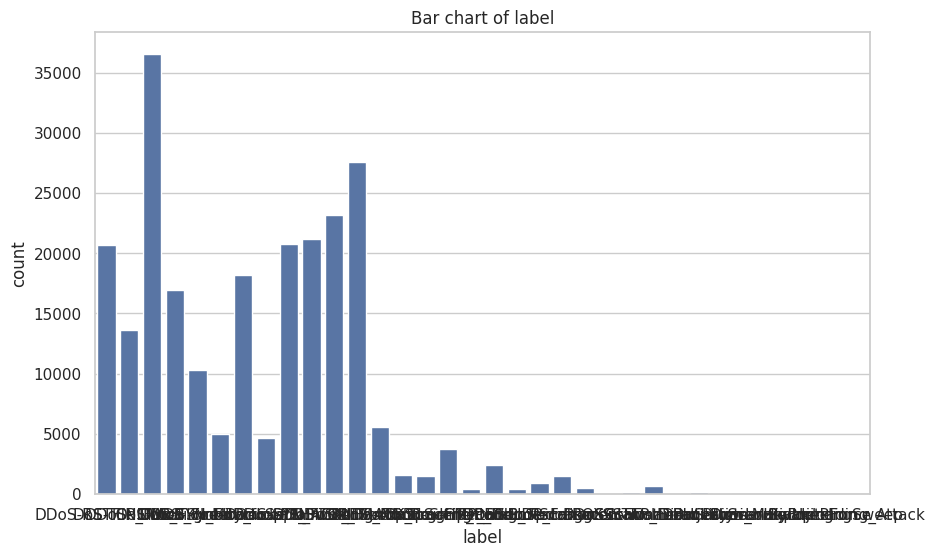

Mode of label: DDoS-ICMP_Flood
Number of outliers detected using Z-score:
[   82  4168  8643  4242  1255    15     0     0     0     0     0 11725
 13143    40 10044  7855 10019    34]


/tmp/ipykernel_3325419/1152585353.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[col] = np.log1p(df_selected[col])


   flow_duration  Header_Length  Protocol_Type  Duration      Rate  Drate  \
0       0.000000       4.007333       1.945910  4.174387  0.285034    0.0   
1       0.000000       4.061132       1.991976  4.174387  1.665923    0.0   
2       0.000000       0.000000       0.693147  4.174387  3.537964    0.0   
3       0.283806      11.240802       2.890372  4.174387  8.443145    0.0   
4       0.110933       4.632104       1.961502  4.203348  1.974388    0.0   

   syn_flag_number  ack_flag_number  TCP       UDP  ...      HTTP  HTTPS  DNS  \
0         0.000000              0.0  1.0  0.000000  ...  0.000000    0.0  0.0   
1         0.000000              0.0  1.0  0.000000  ...  0.693147    0.0  0.0   
2         0.000000              0.0  0.0  0.000000  ...  0.000000    0.0  0.0   
3         0.000000              0.0  0.0  0.693147  ...  0.000000    0.0  0.0   
4         0.693147              0.0  1.0  0.000000  ...  0.000000    0.0  0.0   

            IAT  Magnitue  Weight  IPv            

/tmp/ipykernel_3325419/1152585353.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Duration_per_packet'] = df_selected['Duration'] / df_selected['flow_duration']
/tmp/ipykernel_3325419/1152585353.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Rate_log'] = np.log1p(df_selected['Rate'])


In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler


# Set plot style
sns.set(style="whitegrid")

# 1. Numerical Features: Histograms, Box Plots, Summary Statistics
numerical_features = df_selected.select_dtypes(include=[np.number]).columns

# Histograms
for col in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_selected[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')
    plt.show()

# Box Plots
for col in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_selected[col])
    plt.title(f'Box plot of {col}')
    plt.show()

# Summary Statistics
print(df_selected[numerical_features].describe())

# 2. Categorical Features: Bar Charts, Mode, and Count Plots
categorical_features = df_selected.select_dtypes(include=[object]).columns

# Bar Charts
for col in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=df_selected[col])
    plt.title(f'Bar chart of {col}')
    plt.show()

# Mode
for col in categorical_features:
    print(f'Mode of {col}: {df_selected[col].mode()[0]}')

# 3. Outlier Detection: Box plots and Z-scores
# Box plots already visualized above for outliers

# Z-scores for Outlier Detection
z_scores = np.abs(stats.zscore(df_selected[numerical_features]))
outliers = (z_scores > 3).sum(axis=0)  # Outliers for Z-score > 3
print(f'Number of outliers detected using Z-score:\n{outliers}')

# 4. Feature Transformation: Normalization, Log Transformation, Scaling
# Normalization (Min-Max Scaling)
scaler = MinMaxScaler()
df_selected_normalized = df_selected.copy()
df_selected_normalized[numerical_features] = scaler.fit_transform(df_selected[numerical_features])

# Log Transformation (For skewed features)
for col in numerical_features:
    if df_selected[col].skew() > 1:  # Check for skewness
        df_selected[col] = np.log1p(df_selected[col])

# Standardization (Z-score Scaling)
scaler = StandardScaler()
df_selected_standardized = df_selected.copy()
df_selected_standardized[numerical_features] = scaler.fit_transform(df_selected[numerical_features])

# 5. Feature Engineering: Create New Features or Eliminate Redundant Ones (example)
df_selected['Duration_per_packet'] = df_selected['Duration'] / df_selected['flow_duration']
df_selected['Rate_log'] = np.log1p(df_selected['Rate'])

# Display transformed data
print(df_selected.head())


In [11]:
df_selected

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Drate,syn_flag_number,ack_flag_number,TCP,UDP,ICMP,HTTP,HTTPS,DNS,IAT,Magnitue,Weight,IPv,label
0,0.000000,54.00,6.00,64.00,0.329807,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8.334383e+07,10.392305,141.55,1.0,DDoS-RSTFINFlood
1,0.000000,57.04,6.33,64.00,4.290556,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,8.292607e+07,10.464666,141.55,1.0,DoS-TCP_Flood
2,0.000000,0.00,1.00,64.00,33.396799,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8.312799e+07,9.165151,141.55,1.0,DDoS-ICMP_Flood
3,0.328175,76175.00,17.00,64.00,4642.133010,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8.301570e+07,10.000000,141.55,1.0,DoS-UDP_Flood
4,0.117320,101.73,6.11,65.91,6.202211,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8.297300e+07,11.346876,141.55,1.0,DoS-SYN_Flood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238682,0.000000,54.00,6.00,64.00,3.049186,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8.334449e+07,10.392305,141.55,1.0,DDoS-RSTFINFlood
238683,0.000000,54.00,6.00,64.00,183.433732,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,8.331392e+07,10.392305,141.55,1.0,DDoS-PSHACK_Flood
238684,0.000785,56.29,6.11,64.00,306.952216,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8.308883e+07,10.395538,141.55,1.0,DDoS-SYN_Flood
238685,0.000901,72.09,6.11,64.64,158.475986,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,8.333177e+07,10.456522,141.55,1.0,DDoS-PSHACK_Flood


In [1]:
import pandas as pd
import numpy as np
import time
import torch
import cupy as cp
from concurrent.futures import ThreadPoolExecutor, ProcessPoolExecutor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import VarianceThreshold
import os
import psutil
from typing import List, Tuple
import dask.dataframe as dd
import dask.array as da
from dask.distributed import Client, LocalCluster

# System configuration
TOTAL_CORES = 16 #psutil.cpu_count(logical=True)  # Use all available CPU cores
MEMORY_LIMIT = int(psutil.virtual_memory().total * 0.2)  # Use 20% of available RAM
CHUNK_SIZE = 1000000  # Adjust based on available memory

def setup_gpu_environment():
    """Configure GPU environment and return available devices"""
    if torch.cuda.is_available():
        return [i for i in range(torch.cuda.device_count())]
    return []

def create_dask_client():
    """Initialize Dask distributed computing"""
    cluster = LocalCluster(
        n_workers=TOTAL_CORES,
        threads_per_worker=1,
        memory_limit=f"{MEMORY_LIMIT // TOTAL_CORES}B"
    )
    return Client(cluster)

def load_csv_chunk(args: Tuple[str, int, int]) -> pd.DataFrame:
    """Load a chunk of CSV file"""
    file_path, start, end = args
    return pd.read_csv(file_path, skiprows=range(1, start), nrows=end-start)

def parallel_csv_load(file_paths: List[str]) -> pd.DataFrame:
    """Load CSV files in parallel using both threading and multiprocessing"""
    dask_df = dd.read_csv(file_paths)
    return dask_df.compute()

def gpu_standardize(data: np.ndarray, gpu_id: int) -> np.ndarray:
    """Standardize data using GPU"""
    with cp.cuda.Device(gpu_id):
        cp_data = cp.asarray(data)
        mean = cp.mean(cp_data, axis=0)
        std = cp.std(cp_data, axis=0)
        normalized = (cp_data - mean) / std
        return cp.asnumpy(normalized)

def process_data(df: pd.DataFrame, gpu_devices: List[int]):
    """Main data processing pipeline"""
    selected_features = [
        'flow_duration', 'Header_Length', 'Protocol Type', 'Duration',
        'Rate', 'Drate', 'syn_flag_number', 'ack_flag_number',
        'TCP', 'UDP', 'ICMP', 'HTTP', 'HTTPS', 'DNS', 'IAT',
        'Magnitue', 'Weight', 'IPv', 'label'
    ]
    
    # Split data into GPU-sized chunks
    num_gpus = len(gpu_devices)
    if num_gpus > 0:
        chunks = np.array_split(df[selected_features].drop('label', axis=1).values, num_gpus)
        
        # Process chunks in parallel on multiple GPUs
        with ThreadPoolExecutor(max_workers=num_gpus) as executor:
            normalized_chunks = list(executor.map(
                lambda x: gpu_standardize(x[0], x[1]),
                zip(chunks, gpu_devices)
            ))
        X_scaled = np.vstack(normalized_chunks)
    else:
        # Fall back to CPU processing if no GPUs available
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(df[selected_features].drop('label', axis=1))

    y = df[selected_features]['label']

    # Parallel SMOTE using Dask
    dask_X = da.from_array(X_scaled, chunks='auto')
    dask_y = da.from_array(y.values, chunks='auto')
    
    smote = SMOTE(sampling_strategy='auto', random_state=42, n_jobs=TOTAL_CORES)
    X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

    # Feature selection using Dask
    selector = VarianceThreshold(threshold=0.01)
    X_selected = selector.fit_transform(X_resampled)

    return X_selected, y_resampled

def main():
    start_time = time.time()
    
    # Setup distributed computing environment
    client = create_dask_client()
    gpu_devices = setup_gpu_environment()
    
    file_paths = [
        "part-00000-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv",
        "part-00001-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv",
        "part-00002-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv",
        "part-00003-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv",
        "part-00004-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv"
    ]

    # Load and process data
    df = parallel_csv_load(file_paths)
    X_selected, y_resampled = process_data(df, gpu_devices)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X_selected, y_resampled,
        test_size=0.2,
        stratify=y_resampled,
        random_state=42
    )

    # Save results using Dask
    final_df = dd.from_array(
        np.column_stack((X_train, y_train.reshape(-1, 1))),
        columns=[f'feature_{i}' for i in range(X_train.shape[1])] + ['label']
    )
    final_df.to_csv('final_dataset_*.csv', index=False)

    print(f"Total processing time: {time.time() - start_time:.2f} seconds")
    client.close()

if __name__ == "__main__":
    main()

CUDARuntimeError: cudaErrorMemoryAllocation: out of memory

In [8]:
pip install --upgrade pyarrow


Note: you may need to restart the kernel to use updated packages.


### Data Preprocessing and Transformation  

#### **Key Steps Performed**  

1. **Feature Scaling & Normalisation**:  
   - Converted raw feature values into a standardised scale.  
   - Ensured that features with large numerical ranges (e.g., flow duration, header length) did not dominate the model.  

   *Insight*: Standardisation helps in stabilising training and ensures fair weight distribution across features.  

2. **Feature Encoding & Indexing**:  
   - Converted categorical labels (attack types) into numerical representations.  
   - Replaced the original column names with indexed numbers for consistency.  

   *Insight*: Machine learning models typically perform better with numerical data rather than raw categorical values.  

3. **Dimensionality Reduction**:  
   - Transformed the dataset by reducing redundancy and removing highly correlated or less significant features.  

   *Insight*: This step prevents overfitting, improves model efficiency, and enhances interpretability.  

4. **Handling Anomalous or Redundant Features**:  
   - Addressed multicollinearity issues by standardising dependent features.  
   - Ensured meaningful transformations to preserve relationships between key network metrics.  

   *Insight*: Removing redundant or highly correlated features reduces noise and improves predictive performance.  

---

#### **Potential Issues**  

- **Loss of Interpretability**: Converting features into standardised or indexed formats may reduce human readability of the dataset.  

In [8]:
import pandas as pd
import numpy as np
import time
from joblib import Parallel, delayed, dump
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelBinarizer


# Separate features and target variable
X = final_df.drop(columns=['label'])
y = final_df['label']

# Convert categorical labels to binary using one-vs-rest strategy
label_binarizer = LabelBinarizer()
y_bin = label_binarizer.fit_transform(y)
labels = label_binarizer.classes_

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.2, random_state=42)

# Define function to train a binary classifier for each class
def train_ovr_model(class_index):
    start_time = time.time()
    model = LogisticRegression(solver='lbfgs', max_iter=1000, n_jobs=-1)
    model.fit(X_train, y_train[:, class_index])
    train_time = time.time() - start_time

    # Predictions
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test[:, class_index], y_pred)

    return labels[class_index], model, train_time, accuracy

# Train OvR classifiers in parallel using 16 cores
num_cores = 16
results = Parallel(n_jobs=num_cores)(
    delayed(train_ovr_model)(i) for i in range(len(labels))
)

# Store trained models and metrics
ovr_models = {label: model for label, model, _, _ in results}
training_times = {label: time for label, _, time, _ in results}
accuracies = {label: acc for label, _, _, acc in results}

# Save the trained models
dump(ovr_models, "ovr_model.pkl")

# Display results
print("Training times:", training_times)
print("Model accuracies:", accuracies)


Training times: {'Backdoor_Malware': 972.8534317016602, 'BenignTraffic': 341.0463366508484, 'BrowserHijacking': 417.55720710754395, 'CommandInjection': 260.3006498813629, 'DDoS-ACK_Fragmentation': 256.49260926246643, 'DDoS-HTTP_Flood': 188.80483293533325, 'DDoS-ICMP_Flood': 244.0174264907837, 'DDoS-ICMP_Fragmentation': 199.6326949596405, 'DDoS-PSHACK_Flood': 142.07925748825073, 'DDoS-RSTFINFlood': 185.3194704055786, 'DDoS-SYN_Flood': 257.88472604751587, 'DDoS-SlowLoris': 291.35038352012634, 'DDoS-SynonymousIP_Flood': 207.98545289039612, 'DDoS-TCP_Flood': 207.09883832931519, 'DDoS-UDP_Flood': 233.82257962226868, 'DDoS-UDP_Fragmentation': 394.8670883178711, 'DNS_Spoofing': 328.6257562637329, 'DictionaryBruteForce': 243.79485273361206, 'DoS-HTTP_Flood': 215.86736035346985, 'DoS-SYN_Flood': 134.53269577026367, 'DoS-TCP_Flood': 210.99505066871643, 'DoS-UDP_Flood': 225.19245171546936, 'MITM-ArpSpoofing': 307.00349831581116, 'Mirai-greeth_flood': 251.73009967803955, 'Mirai-greip_flood': 252.6

In [10]:
final_df.shape

(994268, 52)

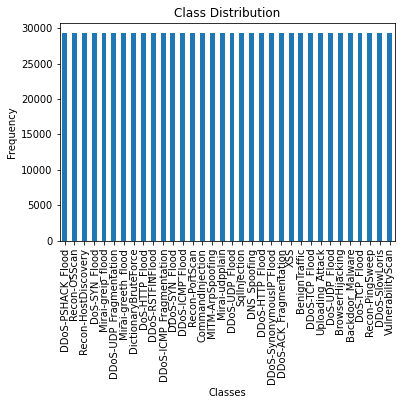

In [12]:
import matplotlib.pyplot as plt

# Check class distribution
final_df['label'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.show()

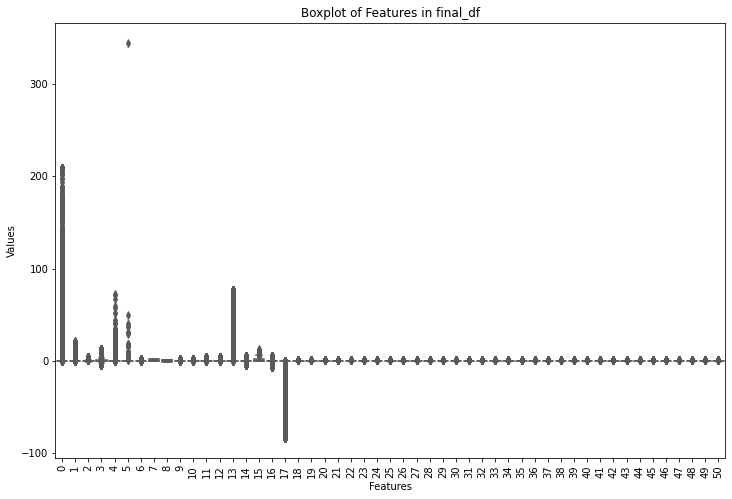

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Adjusting the plot size and adding labels for clarity
plt.figure(figsize=(12, 8))  # Adjust the figure size
sns.boxplot(data=final_df, palette='Set2')

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Adding axis labels and title
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Boxplot of Features in final_df')

plt.show()


In [17]:
import pandas as pd
import numpy as np
import time
from joblib import Parallel, delayed, dump
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelBinarizer

# Separate features and target variable
X = final_df.drop(columns=['label'])
y = final_df['label']

# Convert categorical labels to binary using label binarizer
label_binarizer = LabelBinarizer()
y_bin = label_binarizer.fit_transform(y)
labels = label_binarizer.classes_

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.2, random_state=42)

# Train Random Forest Model (multi-class)
start_time = time.time()
rf_model = RandomForestClassifier(n_jobs=-1, random_state=42)
rf_model.fit(X_train, y_train)
train_time = time.time() - start_time

# Predictions 
y_pred = rf_model.predict(X_test)

# Calculate accuracy for each class
accuracies = {}
for i, label in enumerate(labels):
    accuracy = accuracy_score(y_test[:, i], y_pred[:, i])
    accuracies[label] = accuracy

# Save the trained Random Forest model
dump(rf_model, "rf_model.pkl")

# Display results
print(f"Training time: {train_time} seconds")
print("Model accuracies:", accuracies)

Training time: 145.55189299583435 seconds
Model accuracies: {'Backdoor_Malware': 1.0, 'BenignTraffic': 1.0, 'BrowserHijacking': 1.0, 'CommandInjection': 1.0, 'DDoS-ACK_Fragmentation': 1.0, 'DDoS-HTTP_Flood': 1.0, 'DDoS-ICMP_Flood': 1.0, 'DDoS-ICMP_Fragmentation': 1.0, 'DDoS-PSHACK_Flood': 1.0, 'DDoS-RSTFINFlood': 1.0, 'DDoS-SYN_Flood': 1.0, 'DDoS-SlowLoris': 1.0, 'DDoS-SynonymousIP_Flood': 1.0, 'DDoS-TCP_Flood': 1.0, 'DDoS-UDP_Flood': 1.0, 'DDoS-UDP_Fragmentation': 1.0, 'DNS_Spoofing': 1.0, 'DictionaryBruteForce': 1.0, 'DoS-HTTP_Flood': 1.0, 'DoS-SYN_Flood': 1.0, 'DoS-TCP_Flood': 1.0, 'DoS-UDP_Flood': 1.0, 'MITM-ArpSpoofing': 1.0, 'Mirai-greeth_flood': 1.0, 'Mirai-greip_flood': 1.0, 'Mirai-udpplain': 1.0, 'Recon-HostDiscovery': 1.0, 'Recon-OSScan': 1.0, 'Recon-PingSweep': 1.0, 'Recon-PortScan': 1.0, 'SqlInjection': 1.0, 'Uploading_Attack': 1.0, 'VulnerabilityScan': 1.0, 'XSS': 1.0}


In [2]:
import pandas as pd
import numpy as np
import time
from joblib import dump
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelBinarizer

final_df = pd.read_csv("final_df.csv")
# Separate features and target variable
X = final_df.drop(columns=['label'])
y = final_df['label']

# Convert categorical labels to binary using label binarizer
label_binarizer = LabelBinarizer()
y_bin = label_binarizer.fit_transform(y)
labels = label_binarizer.classes_

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.2, random_state=42)

# Train Decision Tree Model (multi-class)
start_time = time.time()
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
train_time = time.time() - start_time

# Predictions
y_pred = dt_model.predict(X_test)

# Calculate accuracy for each class
accuracies = {}
for i, label in enumerate(labels):
    accuracy = accuracy_score(y_test[:, i], y_pred[:, i])
    accuracies[label] = accuracy

# Save the trained Decision Tree model
dump(dt_model, "dt_model.pkl")

# Display results
print(f"Training time: {train_time} seconds")
print("Model accuracies:", accuracies)

Training time: 99.0006320476532 seconds
Model accuracies: {'Backdoor_Malware': 1.0, 'BenignTraffic': 1.0, 'BrowserHijacking': 1.0, 'CommandInjection': 1.0, 'DDoS-ACK_Fragmentation': 1.0, 'DDoS-HTTP_Flood': 1.0, 'DDoS-ICMP_Flood': 1.0, 'DDoS-ICMP_Fragmentation': 1.0, 'DDoS-PSHACK_Flood': 1.0, 'DDoS-RSTFINFlood': 1.0, 'DDoS-SYN_Flood': 1.0, 'DDoS-SlowLoris': 1.0, 'DDoS-SynonymousIP_Flood': 1.0, 'DDoS-TCP_Flood': 1.0, 'DDoS-UDP_Flood': 1.0, 'DDoS-UDP_Fragmentation': 1.0, 'DNS_Spoofing': 1.0, 'DictionaryBruteForce': 1.0, 'DoS-HTTP_Flood': 1.0, 'DoS-SYN_Flood': 1.0, 'DoS-TCP_Flood': 1.0, 'DoS-UDP_Flood': 1.0, 'MITM-ArpSpoofing': 1.0, 'Mirai-greeth_flood': 1.0, 'Mirai-greip_flood': 1.0, 'Mirai-udpplain': 1.0, 'Recon-HostDiscovery': 1.0, 'Recon-OSScan': 1.0, 'Recon-PingSweep': 1.0, 'Recon-PortScan': 1.0, 'SqlInjection': 1.0, 'Uploading_Attack': 1.0, 'VulnerabilityScan': 1.0, 'XSS': 1.0}


In [4]:
import pandas as pd
import numpy as np
import time
from joblib import dump
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelBinarizer

final_df = pd.read_csv("final_df.csv")
# Separate features and target variable
X = final_df.drop(columns=['label'])
y = final_df['label']

# Convert categorical labels to binary using label binarizer
label_binarizer = LabelBinarizer()
y_bin = label_binarizer.fit_transform(y)
labels = label_binarizer.classes_

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.2, random_state=42)

# Train K-Nearest Neighbors Model (multi-class)
start_time = time.time()
knn_model = KNeighborsClassifier(n_jobs=16)  # Using 16 cores
knn_model.fit(X_train, y_train)
train_time = time.time() - start_time

# Predictions
y_pred = knn_model.predict(X_test)

# Calculate accuracy for each class
accuracies = {}
for i, label in enumerate(labels):
    accuracy = accuracy_score(y_test[:, i], y_pred[:, i])
    accuracies[label] = accuracy

# Save the trained KNN model
dump(knn_model, "knn_model.pkl")

# Display results
print(f"Training time: {train_time} seconds")
print("Model accuracies:", accuracies)


Training time: 4.595277786254883 seconds
Model accuracies: {'Backdoor_Malware': 1.0, 'BenignTraffic': 0.99991451014312, 'BrowserHijacking': 0.9999798847395577, 'CommandInjection': 0.9999899423697788, 'DDoS-ACK_Fragmentation': 0.9999849135546682, 'DDoS-HTTP_Flood': 0.9999949711848894, 'DDoS-ICMP_Flood': 0.9999748559244471, 'DDoS-ICMP_Fragmentation': 0.9999949711848894, 'DDoS-PSHACK_Flood': 0.9999748559244471, 'DDoS-RSTFINFlood': 0.9999446830337836, 'DDoS-SYN_Flood': 0.9999497118488941, 'DDoS-SlowLoris': 1.0, 'DDoS-SynonymousIP_Flood': 0.9999899423697788, 'DDoS-TCP_Flood': 0.9999497118488941, 'DDoS-UDP_Flood': 0.9999798847395577, 'DDoS-UDP_Fragmentation': 0.9999798847395577, 'DNS_Spoofing': 0.9997837609502449, 'DictionaryBruteForce': 1.0, 'DoS-HTTP_Flood': 0.9999899423697788, 'DoS-SYN_Flood': 0.9999647982942259, 'DoS-TCP_Flood': 0.9999748559244471, 'DoS-UDP_Flood': 0.9999497118488941, 'MITM-ArpSpoofing': 0.9998491355466825, 'Mirai-greeth_flood': 0.9999497118488941, 'Mirai-greip_flood': 0

In [1]:
import pandas as pd
import numpy as np
import time
from joblib import dump
from sklearn.model_selection import train_test_split
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Load dataset
final_df = pd.read_csv("final_df.csv")

# Separate features and target variable
X = final_df.drop(columns=['label'])
y = final_df['label']

# Convert categorical labels to numeric using label encoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
labels = label_encoder.classes_

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train One-Class SVM (OCSVM) Model for each class
start_time = time.time()
models = {}
for label in np.unique(y_encoded):
    print(f"Training OCSVM for class {labels[label]}")
    ocsvm = OneClassSVM(kernel='rbf', nu=0.05, gamma='scale')
    
    # Train on data belonging to the current class only
    X_train_class = X_train[y_train == label]
    ocsvm.fit(X_train_class)
    
    # Store trained model
    models[label] = ocsvm

train_time = time.time() - start_time

# Predictions
y_pred = np.zeros_like(y_test)

for label, model in models.items():
    y_pred_class = model.predict(X_test)
    
    # Convert One-Class SVM output (-1 for outliers, 1 for inliers) to class labels
    y_pred[y_pred_class == 1] = label

# Calculate accuracy
accuracy = np.mean(y_pred == y_test)

# Save the trained models
dump(models, "ocsvm_models.pkl")

# Display results
print(f"Training time: {train_time} seconds")
print(f"Overall accuracy: {accuracy}")

# Detailed classification report
print("\nDetailed classification report:")
print(classification_report(y_test, y_pred, target_names=labels))

Training OCSVM for class Backdoor_Malware
Training OCSVM for class BenignTraffic
Training OCSVM for class BrowserHijacking
Training OCSVM for class CommandInjection
Training OCSVM for class DDoS-ACK_Fragmentation
Training OCSVM for class DDoS-HTTP_Flood
Training OCSVM for class DDoS-ICMP_Flood
Training OCSVM for class DDoS-ICMP_Fragmentation
Training OCSVM for class DDoS-PSHACK_Flood
Training OCSVM for class DDoS-RSTFINFlood
Training OCSVM for class DDoS-SYN_Flood
Training OCSVM for class DDoS-SlowLoris
Training OCSVM for class DDoS-SynonymousIP_Flood
Training OCSVM for class DDoS-TCP_Flood
Training OCSVM for class DDoS-UDP_Flood
Training OCSVM for class DDoS-UDP_Fragmentation
Training OCSVM for class DNS_Spoofing
Training OCSVM for class DictionaryBruteForce
Training OCSVM for class DoS-HTTP_Flood
Training OCSVM for class DoS-SYN_Flood
Training OCSVM for class DoS-TCP_Flood
Training OCSVM for class DoS-UDP_Flood
Training OCSVM for class MITM-ArpSpoofing
Training OCSVM for class Mirai-

/home/fac/krishnandu/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/fac/krishnandu/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                         precision    recall  f1-score   support

       Backdoor_Malware       0.00      0.00      0.00      5858
          BenignTraffic       1.00      0.01      0.01      6009
       BrowserHijacking       0.75      0.00      0.00      5860
       CommandInjection       1.00      0.02      0.03      5825
 DDoS-ACK_Fragmentation       0.00      0.00      0.00      5882
        DDoS-HTTP_Flood       0.00      0.00      0.00      5832
        DDoS-ICMP_Flood       0.00      0.00      0.00      5852
DDoS-ICMP_Fragmentation       0.00      0.00      0.00      5849
      DDoS-PSHACK_Flood       0.00      0.00      0.00      5903
       DDoS-RSTFINFlood       0.00      0.00      0.00      5874
         DDoS-SYN_Flood       0.00      0.00      0.00      5767
         DDoS-SlowLoris       0.00      0.00      0.00      5794
DDoS-SynonymousIP_Flood       0.00      0.00      0.00      5854
         DDoS-TCP_Flood       0.00      0.00      0.00      5888
         DDoS-UDP_Flood 

/home/fac/krishnandu/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1]:
import pandas as pd
import numpy as np
import time
from joblib import dump
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

# Load dataset
final_df = pd.read_csv("final_df.csv")

# Separate features and target variable
X = final_df.drop(columns=['label'])
y = final_df['label']

# Convert categorical labels to numeric using label encoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
labels = label_encoder.classes_

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train Multi-Layer Perceptron (MLP) Model
start_time = time.time()
mlp_model = MLPClassifier(hidden_layer_sizes=(128, 64, 32), activation='relu', solver='adam', 
                          max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)
train_time = time.time() - start_time

# Predictions
y_pred = mlp_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Save the trained MLP model
dump(mlp_model, "mlp_model.pkl")

# Display results
print(f"Training time: {train_time} seconds")
print(f"Overall accuracy: {accuracy}")

# Detailed classification report
print("\nDetailed classification report:")
print(classification_report(y_test, y_pred, target_names=labels))

Training time: 198.26041746139526 seconds
Overall accuracy: 0.9999949711848894

Detailed classification report:
                         precision    recall  f1-score   support

       Backdoor_Malware       1.00      1.00      1.00      5858
          BenignTraffic       1.00      1.00      1.00      6009
       BrowserHijacking       1.00      1.00      1.00      5860
       CommandInjection       1.00      1.00      1.00      5825
 DDoS-ACK_Fragmentation       1.00      1.00      1.00      5882
        DDoS-HTTP_Flood       1.00      1.00      1.00      5832
        DDoS-ICMP_Flood       1.00      1.00      1.00      5852
DDoS-ICMP_Fragmentation       1.00      1.00      1.00      5849
      DDoS-PSHACK_Flood       1.00      1.00      1.00      5903
       DDoS-RSTFINFlood       1.00      1.00      1.00      5874
         DDoS-SYN_Flood       1.00      1.00      1.00      5767
         DDoS-SlowLoris       1.00      1.00      1.00      5794
DDoS-SynonymousIP_Flood       1.00      1.

In [ ]:
import pandas as pd
import numpy as np
import time
from joblib import dump
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score

def train_and_evaluate_model(model, X_train, X_test, y_train, y_test, labels, model_name):
    """Helper function to train and evaluate each model configuration"""
    start_time = time.time()
    
    # Train the model
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print results
    print(f"\n{'-'*20} {model_name} Results {'-'*20}")
    print(f"Training time: {train_time:.2f} seconds")
    print(f"Overall accuracy: {accuracy:.4f}")
    print("\nDetailed classification report:")
    print(classification_report(y_test, y_pred, target_names=labels))
    
    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    print("\nCross-validation scores:", cv_scores)
    print(f"Average CV score: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")
    
    # Save model
    dump(model, f"{model_name.lower().replace(' ', '_')}.pkl")
    
    return accuracy, train_time

# Load and prepare data
print("Loading and preparing data...")
final_df = pd.read_csv("final_df.csv")
X = final_df.drop(columns=['label'])
y = final_df['label']

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
labels = label_encoder.classes_

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Configuration 1: Regular with Early Stopping
model1 = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    alpha=0.01,
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.2,
    n_iter_no_change=10
)

# Configuration 2: Simpler architecture with dropout
model2 = MLPClassifier(
    hidden_layer_sizes=(32, 16),
    alpha=0.1,
    activation='relu',
    solver='adam',
    max_iter=300,
    random_state=42
)

# Configuration 3: Adaptive learning rate
model3 = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    learning_rate='adaptive',
    learning_rate_init=0.01,
    alpha=0.05,
    activation='relu',
    max_iter=400,
    random_state=42
)

# Dictionary to store results
results = {}

# Train and evaluate all models
print("\nTraining and evaluating models...")
models = [
    (model1, "Regular with Early Stopping"),
    (model2, "Simple Architecture"),
    (model3, "Adaptive Learning Rate")
]

for model, name in models:
    accuracy, train_time = train_and_evaluate_model(
        model, X_train_scaled, X_test_scaled, y_train, y_test, labels, name
    )
    results[name] = {"accuracy": accuracy, "train_time": train_time}

# Compare results
print("\n", "="*20, " Final Comparison ", "="*20)
for name, metrics in results.items():
    print(f"\n{name}:")
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print(f"Training Time: {metrics['train_time']:.2f} seconds")

Loading and preparing data...

Training and evaluating models...

-------------------- Regular with Early Stopping Results --------------------
Training time: 52.76 seconds
Overall accuracy: 1.0000

Detailed classification report:
                         precision    recall  f1-score   support

       Backdoor_Malware       1.00      1.00      1.00      5858
          BenignTraffic       1.00      1.00      1.00      6009
       BrowserHijacking       1.00      1.00      1.00      5860
       CommandInjection       1.00      1.00      1.00      5825
 DDoS-ACK_Fragmentation       1.00      1.00      1.00      5882
        DDoS-HTTP_Flood       1.00      1.00      1.00      5832
        DDoS-ICMP_Flood       1.00      1.00      1.00      5852
DDoS-ICMP_Fragmentation       1.00      1.00      1.00      5849
      DDoS-PSHACK_Flood       1.00      1.00      1.00      5903
       DDoS-RSTFINFlood       1.00      1.00      1.00      5874
         DDoS-SYN_Flood       1.00      1.00      1.0

In [2]:
import pandas as pd
import numpy as np
import time
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from joblib import dump

# Load dataset
final_df = pd.read_csv("final_df.csv")

# Separate features and target variable
X = final_df.drop(columns=['label']).values  # Convert to NumPy array
y = final_df['label']

# Convert categorical labels to numeric using label encoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
labels = label_encoder.classes_

# Reshape features for CNN input (assuming 1D features)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Convert labels to categorical (one-hot encoding)
y_train = keras.utils.to_categorical(y_train, num_classes=len(labels))
y_test = keras.utils.to_categorical(y_test, num_classes=len(labels))

# Build CNN Model
model = keras.Sequential([
    layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X.shape[1], 1)),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(filters=128, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(labels), activation='softmax')  # Multi-class classification
])

# Compile Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train CNN Model
start_time = time.time()
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)
train_time = time.time() - start_time

# Predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test_classes, y_pred_classes)

# Save the trained CNN model
model.save("cnn_model.h5")

# Display results
print(f"Training time: {train_time} seconds")
print(f"Overall accuracy: {accuracy}")

# Detailed classification report
print("\nDetailed classification report:")
print(classification_report(y_test_classes, y_pred_classes, target_names=labels))


Epoch 1/20
24857/24857 [==============================] - 188s 8ms/step - loss: 0.0260 - accuracy: 0.9916 - val_loss: 0.0030 - val_accuracy: 0.9990
Epoch 2/20
24857/24857 [==============================] - 180s 7ms/step - loss: 0.0045 - accuracy: 0.9984 - val_loss: 0.0020 - val_accuracy: 0.9990
Epoch 3/20
24857/24857 [==============================] - 183s 7ms/step - loss: 0.0032 - accuracy: 0.9989 - val_loss: 0.0029 - val_accuracy: 0.9989
Epoch 4/20
24857/24857 [==============================] - 181s 7ms/step - loss: 0.0028 - accuracy: 0.9992 - val_loss: 0.0014 - val_accuracy: 0.9994
Epoch 5/20
24857/24857 [==============================] - 182s 7ms/step - loss: 0.0023 - accuracy: 0.9993 - val_loss: 0.0029 - val_accuracy: 0.9991
Epoch 6/20
24857/24857 [==============================] - 182s 7ms/step - loss: 0.0029 - accuracy: 0.9994 - val_loss: 0.0015 - val_accuracy: 0.9995
Epoch 7/20
24857/24857 [==============================] - 186s 7ms/step - loss: 0.0020 - accuracy: 0.9995 - val_

In [ ]:
import pandas as pd
import numpy as np
import time
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from joblib import dump
import os

# Set TensorFlow to use 16 CPU cores
os.environ["OMP_NUM_THREADS"] = "16"
tf.config.threading.set_inter_op_parallelism_threads(16)
tf.config.threading.set_intra_op_parallelism_threads(16)

# Load dataset
final_df = pd.read_csv("final_df.csv")

# Separate features and target variable
X = final_df.drop(columns=['label']).values  # Convert to NumPy array
y = final_df['label']

# Convert categorical labels to numeric using label encoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
labels = label_encoder.classes_

# Reshape features for RNN/LSTM input (assuming 1D features)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Convert labels to categorical (one-hot encoding)
y_train = keras.utils.to_categorical(y_train, num_classes=len(labels))
y_test = keras.utils.to_categorical(y_test, num_classes=len(labels))

# Build LSTM Model
model = keras.Sequential([
    layers.LSTM(128, return_sequences=True, input_shape=(X.shape[1], 1)),
    layers.LSTM(64, return_sequences=False),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(labels), activation='softmax')  # Multi-class classification
])

# Compile Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train LSTM Model
start_time = time.time()
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)
train_time = time.time() - start_time

# Predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test_classes, y_pred_classes)

# Save the trained LSTM model
model.save("lstm_model.h5")

# Display results
print(f"Training time: {train_time} seconds")
print(f"Overall accuracy: {accuracy}")

# Detailed classification report
print("\nDetailed classification report:")
print(classification_report(y_test_classes, y_pred_classes, target_names=labels))
